# <center>Trends and Insights</center>
## <center>Analyzing Trending YouTube Videos (2017-2018)</center>

<center><img src='images/Image.png' width=1000, heigth=1000></center>

<strong>Project within the Data Analytics Training Program</strong>.  
The project aims to reinforce theoretical knowledge in descriptive statistics and beyond.

The dataset used for the research is "Trending YouTube Video Statistics," available at the following [link](https://www.kaggle.com/datasets/datasnaek/youtube-new/data).  

Thanks to the [author](https://medium.com/@raahimkhan_85173/data-cleaning-and-exploratory-data-analysis-with-pandas-on-trending-you-tube-video-statistics-e06d7cd08710) for conducting their own analysis and for the open publication.

---
# <center>1. Preparation</center>
<center><img src='images/preparation.jpg' width=1000, heigth=1000></center>

## 1.1 Import essential libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import glob
import os
import re
import json
import pickle
import six
from pathlib import Path
from IPython.display import display, Image
from pywinauto import Application
from pywinauto.keyboard import send_keys
from pprint import pprint
import tabulate
import math
import copy
from scipy import stats
import itertools
import functools
from matplotlib.ticker import ScalarFormatter, FuncFormatter

## 1.2 Setting the required global settings

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# pd.options.mode.chained_assignment = None - I think we should use .lock-method instead chained assignment
tabulate.WIDE_CHARS_MODE = True
tabulate.PRESERVE_WHITESPACE = True
formatter = ScalarFormatter()
formatter.set_scientific(False)
formatter.set_useOffset(False)

## 1.3 Import dataset

To begin with, it is necessary to import the existing dataset and perform a minor adjustment of data types.

In [3]:
# import the files
path = Path(os.getcwd()) / "data"
all_CSV_list = [i for i in glob.glob(str(path / "*.{}".format("csv")))]
all_CSV_list

['f:\\Study projects\\YouTube trends\\data\\CAvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\DEvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\FRvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\GBvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\INvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\JPvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\KRvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\MXvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\RUvideos.csv',
 'f:\\Study projects\\YouTube trends\\data\\USvideos.csv']

In [4]:
# let's add the data-sets in the one list
all_DataFrames = list() # list to store each DataFrame separately
for csv_file in all_CSV_list:
    df = pd.read_csv(csv_file)
    df["country"] = csv_file[(x := (csv_file.rfind('\\', 0, csv_file.rfind("."))) + 1) : x + 2] 
    # adding column "country" so that each dataset could be identified uniquely - CORRECT THIS (YOU HAVE WHOLE PATH)
    all_DataFrames.append(df)

for df in all_DataFrames:
    display(df.sample(2))

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
1017,EmXiFUzz33c,17.19.11,Hells Kitchen Season 17 Episode 7 - Trimming Fat,Hell's Kitchen,24,2017-11-18T02:08:10.000Z,"Hell's|""Kitchen;""|""Gordon""|""Ramsay;""|""The""|""F-...",212930,2074,68,1362,https://i.ytimg.com/vi/EmXiFUzz33c/default.jpg,False,False,False,Chef Ramsay decides to give the 12 remaining c...,CA
18841,ZnX4UQU_pQY,18.18.02,Ronan Farrow Talks Bombshell Report Alleging T...,The View,25,2018-02-16T16:57:05.000Z,"Ronan Farrow|""Donald Trump""|""Hot topics""|""mela...",238948,2393,247,1347,https://i.ytimg.com/vi/ZnX4UQU_pQY/default.jpg,False,False,False,NaN,CA


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
29907,r9dzwhUEuDg,18.20.04,Soy Luna 3 Folge 1 - Simón sieht weiterhin das...,Soy Lunita,1,2018-04-19T16:05:36.000Z,[none],3339,257,3,17,https://i.ytimg.com/vi/r9dzwhUEuDg/default.jpg,False,False,False,NaN,DE
23085,voxGb5WrT5o,18.11.03,Неспростовнi докази о Рубане для Порошенко,Анатолий Шарий,23,2018-03-10T12:12:47.000Z,"шарий|""шарий блог""|""новое видео шарий""|""шарий ...",459278,21685,394,3765,https://i.ytimg.com/vi/voxGb5WrT5o/default.jpg,False,False,False,Новости БЕЗ нашего мнения - http://sharij.net/...,DE


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
30081,DNDVO6GQDhM,18.22.04,Le DJ suédois Avicii est mort à 28 ans,BFMTV,25,2018-04-21T08:21:56.000Z,"culture""|""electro""|""deces""|""bfmactu""|""bfmtv",47443,520,69,135,https://i.ytimg.com/vi/DNDVO6GQDhM/default.jpg,False,False,False,"Le DJ suédois Tim Bergling, alias Avicii, est ...",FR
34221,AijXUXBtuQ4,18.12.05,DJ Erise - Pourquoi tu forces ? ft. Aya Nakamu...,Paroles Françaises,10,2018-05-11T10:00:59.000Z,DJ Erise - Pourquoi tu forces ? ft. Aya Nakamu...,15660,745,9,37,https://i.ytimg.com/vi/AijXUXBtuQ4/default.jpg,False,False,False,DJ Erise - Pourquoi tu forces ? ft. Aya Nakamu...,FR


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
20380,Ob48twC1yf8,18.26.02,Parkland Shooting Survivors on the 'March for ...,TheEllenShow,24,2018-02-23T14:01:11.000Z,"Ellen|""degeneres""|""ellen degeneres""|""the ellen...",1008632,26482,9232,0,https://i.ytimg.com/vi/Ob48twC1yf8/default.jpg,True,False,False,"Emma Gonzalez, Cameron Kasky, and Jaclyn Corin...",GB
25214,eljAjPH6zQI,18.22.03,February Favourites 2018 | Zoella,Zoella,26,2018-03-12T16:00:02.000Z,"zoe sugg|""zoe""|""sugg""|""zoella""|""beauty""|""cosme...",929384,42188,1162,2905,https://i.ytimg.com/vi/eljAjPH6zQI/default.jpg,False,False,False,February Favourites 2018\n⇢ Pre Order Cordiall...,GB


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
22335,RiYZx-XyPrI,18.18.03,"Tech Talks #453 - Facebook Police, Lost Luggag...",Technical Guruji,28,2018-03-17T18:24:40.000Z,"Facebook Police|""Nuclear SpaceShip""|""Vivo V9""|...",173886,18622,651,4049,https://i.ytimg.com/vi/RiYZx-XyPrI/default.jpg,False,False,False,TG Deals@ https://tg.deals/ \nNew Channel: h...,IN
32380,XXUIyOrO3PY,18.18.05,देखिये डिविलियर्स द्वारा हवा में उड़ कर पकड़ा गय...,Sports Edge,17,2018-05-17T20:15:47.000Z,देखिये डिविलियर्स द्वारा हवा में उड़ कर पकड़ा गय...,355776,12246,1228,656,https://i.ytimg.com/vi/XXUIyOrO3PY/default.jpg,False,False,False,देखिये डिविलियर्स द्वारा हवा में उड़ कर पकड़ा गय...,IN


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
14295,G7JClBRVjSQ,18.07.05,GENERATIONS from EXILE TRIBE / 「F.L.Y. BOYS F....,avex,10,2018-05-06T19:00:00.000Z,"GENERATIONS|""GENE""|""ジェネレーションズ""|""ジェネ""|""じぇね""|""白濱...",212294,11432,142,1018,https://i.ytimg.com/vi/G7JClBRVjSQ/default.jpg,False,False,False,初のドームツアー「UNITED JOURNEY」を行うGENERATIONS の2018年第...,JP
730,cwBcZFDZDV0,18.11.02,談判官 Negotiator 10 楊冪 黃子韜 CROTON MEGAHIT Official,Croton MEGA HIT 克頓傳媒2017爆款大劇,24,2018-02-10T16:00:03.000Z,"croton media|""克頓傳媒""|""電視劇""|""大陸劇""|""中國電視劇""|""croto...",94814,418,36,222,https://i.ytimg.com/vi/cwBcZFDZDV0/default.jpg,False,False,False,NaN,JP


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
8679,PALcJ0HW1-I,18.03.01,WALK IN THE WOODS WITH A LOGAN PAUL MEME,PewDiePie,23,2018-01-02T17:12:39.000Z,[none],2619160,235285,11430,20462,https://i.ytimg.com/vi/PALcJ0HW1-I/default.jpg,False,False,False,Full song: https://www.youtube.com/watch?v=n38...,KR
27231,e4OJDCaPGZE,18.03.05,추운날씨에 얼어붙은 악어를 구했습니다.,랭킹잼,22,2018-04-03T09:30:04.000Z,"랭킹잼|""화제의""|""놀라운""|""유행하는""|""악어""|""새""|""벌새""|""색깔변하는차""|...",445226,1887,200,779,https://i.ytimg.com/vi/e4OJDCaPGZE/default.jpg,False,False,False,화제의 영상을 모아서 보여드립니다.[출처]악어: https://www.youtube...,KR


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
15935,rlxh2IbJHIk,18.03.02,JAC SEI 3 Limited - Equipamiento por encima de...,InterAuto,2,2018-02-02T20:30:01.000Z,"JAC SEI 3|""JAC S3""|""JAC SEI 3 Limited""|""JAC S3...",2705,190,4,52,https://i.ytimg.com/vi/rlxh2IbJHIk/default.jpg,False,False,False,"El JAC SEI 3 Limited tiene una larga, larguisi...",MX
14402,0G4sO04766Y,18.27.01,Señora Acero 4 - Capitulo 60 Parte 3/5,Sebastian Acero,24,2018-01-27T04:33:52.000Z,[none],22385,542,25,40,https://i.ytimg.com/vi/0G4sO04766Y/default.jpg,False,False,False,VEAN EL VIDEO....DALE ME GUSTA....Y LISTO...\n...,MX


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
26851,QfgrAgsqyKc,18.30.03,Как Я Воровал Еду ● Русский Дубляж,DIAWANTED,1,2018-03-29T12:41:40.000Z,"Русский Дубляж|""Как""|""Я Воровал""|""Еду""|""аниме ...",88049,5205,154,338,https://i.ytimg.com/vi/QfgrAgsqyKc/default.jpg,False,False,False,Магазин игр - http://zaka-zaka.com/ Группа ВК ...,RU
36993,CBm5Sin7ABM,18.26.05,Тест НОВОЙ Ауди А6! Вот почему у БМВ и Мерседе...,Alan Enileev,2,2018-05-25T16:47:59.000Z,"audi a6|""тест-драйв""|""обзор""|""ауди а6""|""audi""|...",98943,2778,237,578,https://i.ytimg.com/vi/CBm5Sin7ABM/default.jpg,False,False,False,Подборка б/у Audi A6 на Авито: https://goo.gl/...,RU


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
1269,8-u5nd2GqNE,17.20.11,The Secret Protocol for When the Queen Dies,Half as Interesting,27,2017-11-16T15:30:00.000Z,"the|""secret""|""protocal""|""procedure""|""process""|...",978535,25073,772,4344,https://i.ytimg.com/vi/8-u5nd2GqNE/default.jpg,False,False,False,Raise money for charity just by browsing the i...,US
1693,Djxjmq9pvrM,17.22.11,What To Buy HIM: Christmas 2017 | FleurDeForce,Fleur DeForce,26,2017-11-19T17:00:01.000Z,"fleurdeforce|""fleur de force""|""fleurdevlog""|""f...",137551,3892,209,365,https://i.ytimg.com/vi/Djxjmq9pvrM/default.jpg,False,False,False,The third video in our CHRISTMAS GIFT GUIDE se...,US


## 1.4 Fixing data

In [5]:
#views, likes, dislikes and commet_count are already in correct data types i.e int64
for df in all_DataFrames:
    # video_id
    df["video_id"] = df["video_id"].astype("str", errors="raise")

    # trending date and publish date
    df["trending_date"] = pd.to_datetime(arg=df["trending_date"], format="%y.%d.%m", errors="raise")
    df["publish_time"] = pd.to_datetime(arg=df["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ", errors="raise")

    # title
    df["title"] = df["title"].astype("str", errors="raise")

    #channel_title
    df["channel_title"] = df["channel_title"].astype("str", errors="raise")

    #category_id
    df["category_id"] = df["category_id"].astype("str", errors="raise")

    #tags
    df["tags"] = df["tags"].astype("str", errors="raise")

    #thumbnail_link
    df["thumbnail_link"] = df["thumbnail_link"].astype("str", errors="raise")

    #description
    df["description"] = df["description"].astype("str", errors="raise")
    
    #changing comments_disabled, ratings_disabled, video_error_or_removed from bool to catigorical
    df["comments_disabled"] = df["comments_disabled"].astype("category", errors="raise")
    df["ratings_disabled"] = df["ratings_disabled"].astype("category", errors="raise")
    df["video_error_or_removed"] = df["video_error_or_removed"].astype("category", errors="raise")

Separating "<strong>publish_time</strong>" into "<strong><u>publish_date</u></strong>" and "<strong><u>publish_time</u></strong>"

In [6]:
for df in all_DataFrames:
    df.insert(
        loc=4,
        column="publish_date",
        value=df["publish_time"].dt.date,
        allow_duplicates=False
    )
    df["publish_date"] = pd.to_datetime(arg=df["publish_date"], format="%Y-%m-%d", errors="raise")
    df["publish_time"] = df["publish_time"].dt.time

Let's check the types of the DateFrames

In [7]:
display(all_DataFrames[0].dtypes)

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
publish_date              datetime64[ns]
category_id                       object
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
dtype: object

In [8]:
type_list = list()
for column_name, serias in all_DataFrames[0].items():
    type_list.append([column_name, type(serias[0])])
type_table = tabulate.tabulate(type_list, headers=["column", "type"])
print("Particular data types for each element of the columns", type_table, sep="\n")

Particular data types for each element of the columns
column                  type
----------------------  --------------------------------------------------
video_id                <class 'str'>
trending_date           <class 'pandas._libs.tslibs.timestamps.Timestamp'>
title                   <class 'str'>
channel_title           <class 'str'>
publish_date            <class 'pandas._libs.tslibs.timestamps.Timestamp'>
category_id             <class 'str'>
publish_time            <class 'datetime.time'>
tags                    <class 'str'>
views                   <class 'numpy.int64'>
likes                   <class 'numpy.int64'>
dislikes                <class 'numpy.int64'>
comment_count           <class 'numpy.int64'>
thumbnail_link          <class 'str'>
comments_disabled       <class 'numpy.bool_'>
ratings_disabled        <class 'numpy.bool_'>
video_error_or_removed  <class 'numpy.bool_'>
description             <class 'str'>
country                 <class 'str'>


## 1.5 Missing Values Analysis

As evidenced by the results, the data type adjustment was successful. We can now proceed to the analysis of missing values.  

To achieve this, we will generate a ```heatmap``` where missing values in the dataset columns are displayed as orange squares on a black background.

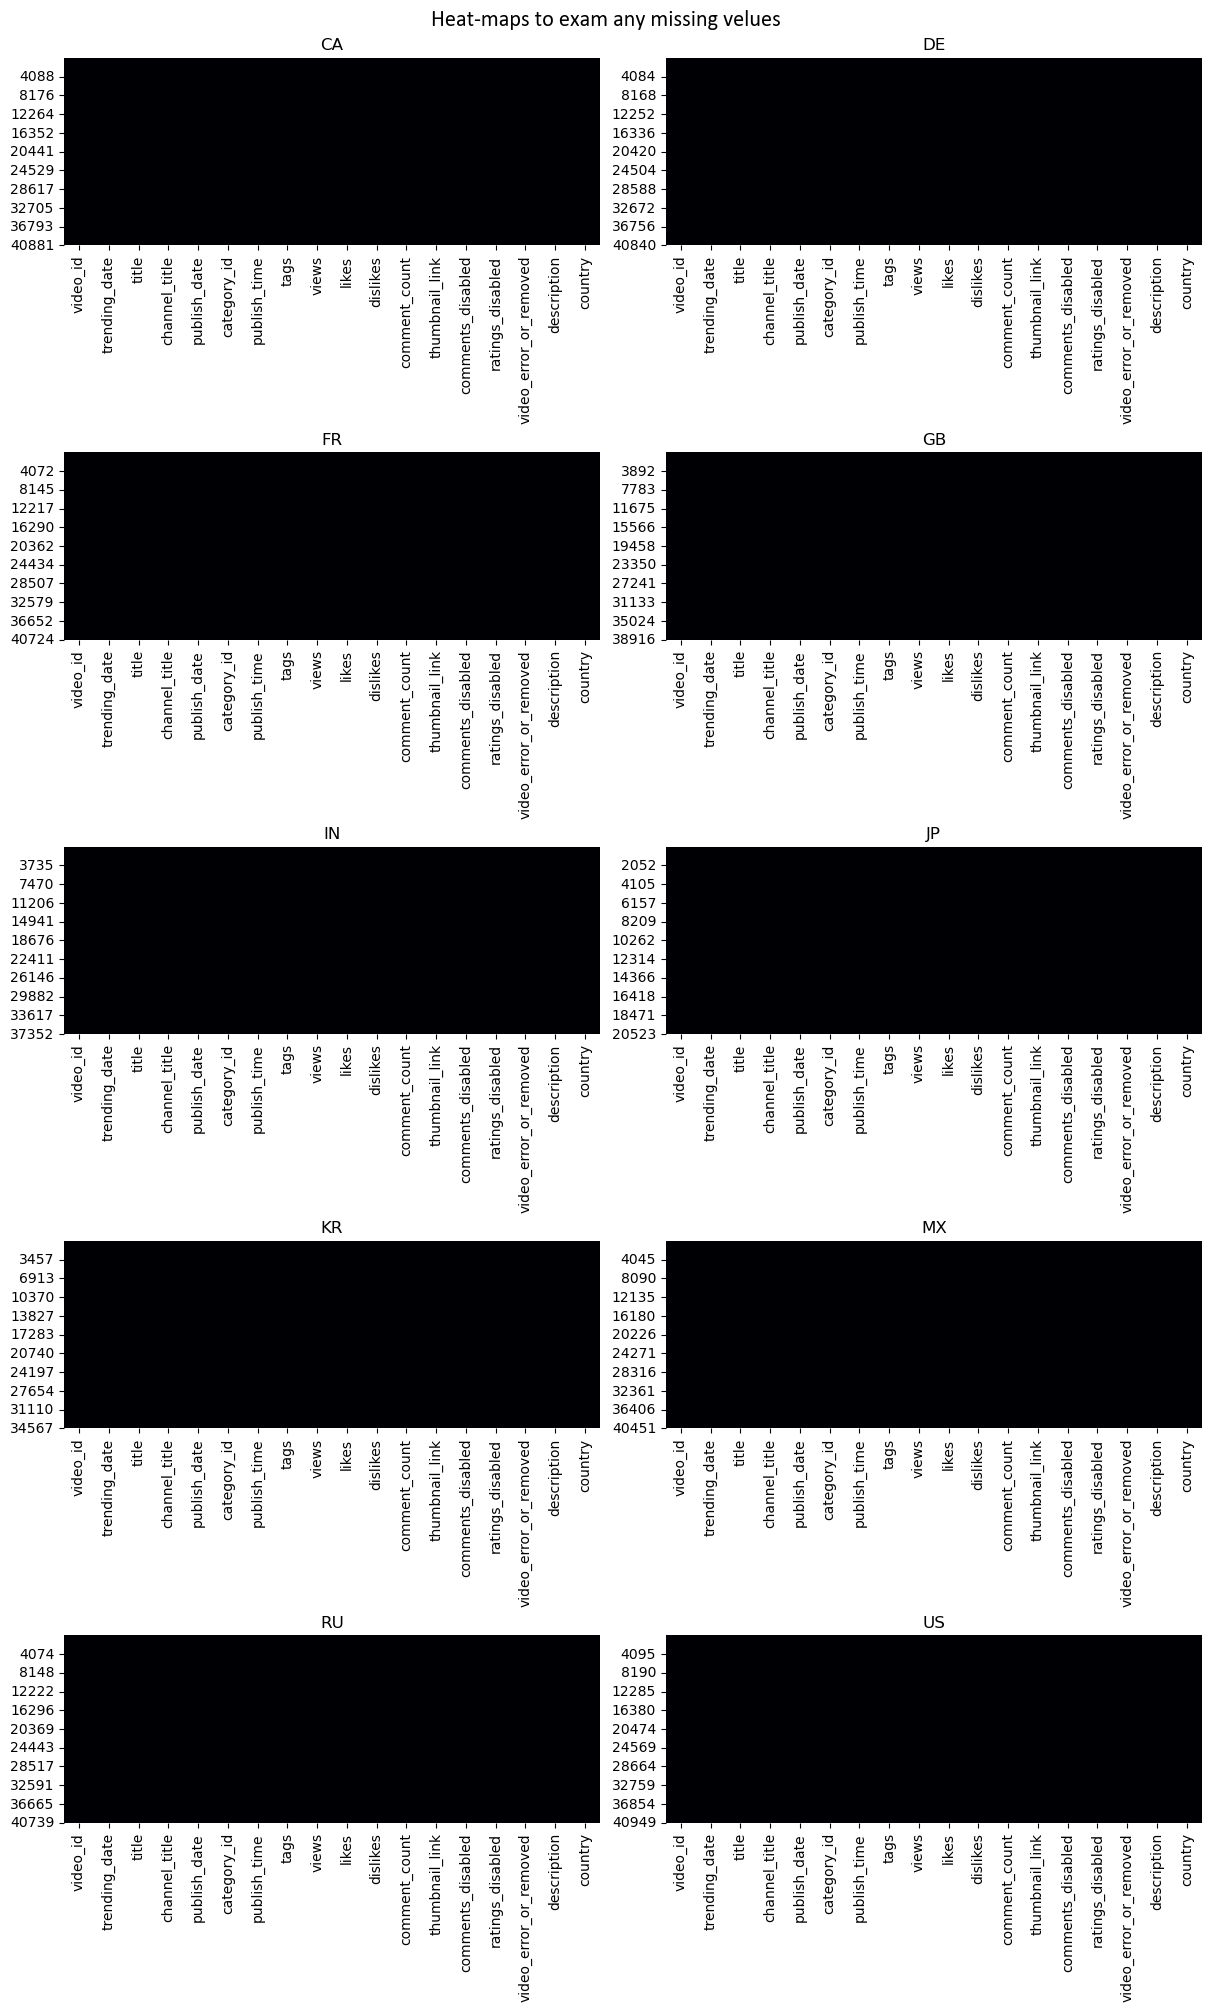

In [9]:
fig, axs = plt.subplots(
    ncols=2,
    nrows=(math.ceil(len(all_DataFrames) / 2)),
    figsize=(12,(h := 20)),
    layout='constrained'
)
row = col = 0
for df in all_DataFrames:
    sns.heatmap(
        data=df.isnull(),
        ax=(new_ax := axs[row][col]),
        cbar=False,
        cmap="magma"
        )
    new_ax.set_title(str(df.loc[0, "country"]))
    
    height_inch = fig.get_size_inches()[1]
    max_value = df.shape[0]
    step = max_value / height_inch * 2
    yticks = np.arange(max_value, 0, -step)
    new_ax.set_yticks(yticks)
    new_ax.set_yticklabels(np.round(yticks).astype(int))

    if col == 1:
        row += 1; col = 0
    else:
        col += 1

fig.suptitle("Heat-maps to exam any missing velues", size=16, font="Calibri")
plt.show()

As evidenced by the heatmaps, there are no missing values in the datasets. 
Missing values can significantly impact the reliability of statistically significant results in research; therefore, addressing these gaps - <i>either by <strong>filling</strong> them or <strong>removing</strong> them from the dataset</i> - is a crucial first step in the research preparation process.

Accordingly, we can proceed with further analysis.

## 1.6 Concatenation all tables into One

To calculate overall metrics across all datasets of the available countries, it is necessary to merge them into a single consolidated DataFrame.

In [10]:
general_df = pd.concat(all_DataFrames)
display(general_df.sample(3))

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
35126,uBYzYji4rmE,2018-05-17,Honest Trailers - Black Panther,Screen Junkies,2018-05-15,1,17:00:06,"screenjunkies|""screen junkies""|""honest trailer...",3411614,89893,4466,14071,https://i.ytimg.com/vi/uBYzYji4rmE/default.jpg,False,False,False,After 17 movies the MCU brings us a superhero ...,FR
16094,pnq_wz81Xv8,2018-02-19,[MV] 김영철 Kim YoungChul - 안되나용 Andenayon (Feat....,MYSTIC Ent.,2018-02-17,10,14:00:05,"김영철|""안되나용""|""휘성""|""아는형님""|""미스틱""|""따르릉""",713801,15100,533,2806,https://i.ytimg.com/vi/pnq_wz81Xv8/default.jpg,False,False,False,"김영철의 이번 파트너는 휘성이다. 지난해 일렉트로트 '따르릉'에서 홍진영과, 캐럴송...",KR
35295,rblZiTO2dLM,2018-05-18,قدور و عويشة - 24 - رمــــــــــضــــــــان,Baraka lBaraka,2018-05-17,23,11:48:47,"بركة|""baraka""|""قدور و عويشة""|""قدور""|""عويشة""|""ك...",455774,20257,785,1458,https://i.ytimg.com/vi/rblZiTO2dLM/default.jpg,False,False,False,باش يوصلكم الجديد كليكيو على الجرس و فرجة ممت...,FR


Due to potential manipulations of the consolidated DataFrame, we have to create a backup to preserve it as the original dataset.  

To perform this, I used the ```copy``` module and its ```deepcopy``` method.

In [11]:
print(general_df["video_id"].nunique() == general_df["video_id"].size)

False


Strangely, the supposed unique index for the videos (```video_id```) is duplicated. Let's investigate why this is happening.

In [12]:
display(general_df[general_df["video_id"].duplicated(keep=False)].sort_values(by="video_id", ascending=True).iloc[:5])

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
3449,#NAME?,2017-12-01,СтопХам - Мисс Ноябрь,StopXam,2017-11-29,2,10:23:58,"Стопхам|""стопхам""|""стоп хам""|""stopxam""|""stop""|...",583133,18490,2117,3186,https://i.ytimg.com/vi/-Luvvm2fpFw/default.jpg,False,False,False,Бесплатный курс по криптовалютам - http://go.t...,RU
13126,#NAME?,2018-01-20,¡Ya apareció el celular de Danna Paola! | Vent...,Ventaneando,2018-01-19,24,23:10:57,"ventaneando|""tv azteca""|""azteca trece""|""azteca...",20807,127,19,28,https://i.ytimg.com/vi/-n0EyI41jPk/default.jpg,False,False,False,La actriz causó revuelo en redes sociales cuan...,MX
6215,#NAME?,2018-03-15,クレーンゲーム1000円対決【のえのん＋ほのぼの＋はちゅ】,なないろちゅーぶ,2018-03-14,22,02:39:25,"クレーンゲーム|""のえのん""|""ほのぼの""|""1000円対決""|""姉妹""",27960,0,0,136,https://i.ytimg.com/vi/-k46ssFMGmM/default.jpg,False,True,False,のえのん ちゃん ほのぼの ちゃん とのコラボ動画はいっぱいあるよ！！\nブルーム【Bloo...,JP
19847,#NAME?,2018-03-03,FIRST BENCHERS vs LAST BENCHERS (EXAM PREPARAT...,Hyderabad Diaries,2018-03-02,24,09:51:05,"Hyderabad|""hyderabad diaries""|""shahrukh k adna...",107810,9679,408,1158,https://i.ytimg.com/vi/-Xm_XWpAXOI/default.jpg,False,False,False,SUBSCRIBE! New Videos Every week!\nSecond Chan...,IN
22342,#NAME?,2018-03-29,sbs cnbc “거래가 뚝 끊겼어요”집값 떨어질 것” 주택가격 심리지수 8ㆍ2대책...,도봉박홍기,2018-03-27,25,17:24:22,[none],56263,2246,119,63,https://i.ytimg.com/vi/-H-MSgdQmY0/default.jpg,False,False,False,우리 은행 (대동포럼) 박 홍기 후원계좌 1005 - 203 - ...,KR


In [13]:
display(general_df[general_df["video_id"].duplicated(keep=False)].sort_values(by="video_id", ascending=False).iloc[:5])

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
1444,zzyGHbhCpV4,2018-02-15,【平昌五輪】「モルゲッソヨ」前に集合ー！ テレビじゃ流せない韓国珍名所ｗｗ,KAZUYA CHANNEL GX,2018-02-15,25,09:00:03,"KAZUYA|""KAZUYA Channel""|""KCGX""|""カズヤ""|""カズヤチャンネル...",3413,172,4,70,https://i.ytimg.com/vi/zzyGHbhCpV4/default.jpg,False,False,False,※2018年2月14日のKCGX生放送より\n\n＜毎週水曜夜9時は YouTuber KA...,JP
1600,zzyGHbhCpV4,2018-02-16,【平昌五輪】「モルゲッソヨ」前に集合ー！ テレビじゃ流せない韓国珍名所ｗｗ,KAZUYA CHANNEL GX,2018-02-15,25,09:00:03,"KAZUYA|""KAZUYA Channel""|""KCGX""|""カズヤ""|""カズヤチャンネル...",9760,233,10,87,https://i.ytimg.com/vi/zzyGHbhCpV4/default.jpg,False,False,False,※2018年2月14日のKCGX生放送より\n\n＜毎週水曜夜9時は YouTuber KA...,JP
1360,zzyGHbhCpV4,2018-02-15,【平昌五輪】「モルゲッソヨ」前に集合ー！ テレビじゃ流せない韓国珍名所ｗｗ,KAZUYA CHANNEL GX,2018-02-15,25,09:00:03,"KAZUYA|""KAZUYA Channel""|""KCGX""|""カズヤ""|""カズヤチャンネル...",3413,172,4,70,https://i.ytimg.com/vi/zzyGHbhCpV4/default.jpg,False,False,False,※2018年2月14日のKCGX生放送より\n\n＜毎週水曜夜9時は YouTuber KA...,JP
2603,zzu-ytbHGR8,2017-11-27,Ультимативно не растерялся - [Бумага],Мартеллиада,2017-11-26,23,09:42:49,"Гера Мартелл|""Мартеллиада""|""Бумага""|""Мультик""|...",276587,31699,681,1605,https://i.ytimg.com/vi/zzu-ytbHGR8/default.jpg,False,False,False,Выбери квартиру на новый год https://goo.gl/k6...,RU
2843,zzu-ytbHGR8,2017-11-28,Ультимативно не растерялся - [Бумага],Мартеллиада,2017-11-26,23,09:42:49,"Гера Мартелл|""Мартеллиада""|""Бумага""|""Мультик""|...",379805,36882,880,1883,https://i.ytimg.com/vi/zzu-ytbHGR8/default.jpg,False,False,False,Выбери квартиру на новый год https://goo.gl/k6...,RU


Based on the samples, it is evident that some videos lack an ID, which is unusual since, as far as I know, YouTube assigns an ID to every video. It might be due to the deletion of videos that remained in the sample but couldn't fetch the ID from the original database during data updates. However, I might be mistaken as I am not very familiar with YouTube's architecture.

Duplicate videos with IDs may be due to the repeated inclusion of the same video in the trending list. These videos might have been removed according to moderation algorithms, possibly due to artificial view inflation to appear in the trending list.

I propose removing duplicates (keeping only the first occurrence of a video in the trends) and videos without IDs to adjust the sample accordingly.

In [14]:
for i in range(len(all_DataFrames)):
    all_DataFrames[i].drop(index=all_DataFrames[i].loc[all_DataFrames[i]["video_id"] == "#NAME?"].index, inplace=True)
    all_DataFrames[i].drop_duplicates(subset="video_id", keep="first", inplace=True)
general_df = pd.concat(all_DataFrames)

## 1.7 Creating general backup

In [15]:
# making copy of the original DataFrame
backup_df = copy.deepcopy(general_df)

# sorting according to latest trending date while removing duplicates
general_df.sort_values(
    by="trending_date",
    ascending=False,
    inplace=True
)
# general_df.drop_duplicates(
#     subset="video_id", 
#     keep="first", 
#     inplace=True
# )
display(general_df.iloc[0:4][["publish_date", "publish_time", "trending_date", "country"]])

,publish_date,publish_time,trending_date,country
40766,2018-06-13,09:00:06,2018-06-14,US
20434,2018-06-13,03:47:24,2018-06-14,JP
20409,2018-06-13,16:38:16,2018-06-14,JP
20410,2018-06-13,12:00:11,2018-06-14,JP


In [16]:
print(general_df["video_id"].nunique() == general_df["video_id"].size)

False


After cleaning each sample of duplicates, there are still duplicate videos in the overall dataset.  
These are likely videos that appeared in the trending lists of multiple countries. Let's verify this."

In [17]:
display(general_df[general_df["video_id"]
                   .duplicated(keep=False)]
                   .sort_values(
                       by="video_id", 
                       ascending=True)
                    .iloc[:10]
                    [["video_id", "country", "trending_date", "publish_date", "publish_time", "title"]])

,video_id,country,trending_date,publish_date,publish_time,title
40319,--45ws7CEN0,CA,2018-06-12,2018-06-12,03:11:18,PlayStation E3 2018 Showcase | English
40271,--45ws7CEN0,RU,2018-06-12,2018-06-12,03:11:18,PlayStation E3 2018 Showcase | English
39972,--45ws7CEN0,MX,2018-06-12,2018-06-12,03:11:18,PlayStation E3 2018 Showcase | English
28534,--7vNbh4UNA,CA,2018-04-14,2018-04-13,19:00:00,"Responding to ALL The Outrage, Ridiculous H3H3..."
28646,--7vNbh4UNA,DE,2018-04-14,2018-04-13,19:00:00,"Responding to ALL The Outrage, Ridiculous H3H3..."
16297,--I0aj8MUdU,FR,2018-02-05,2018-02-04,13:19:38,E diela shqiptare - Ka nje mesazh per ty - Pje...
16251,--I0aj8MUdU,DE,2018-02-05,2018-02-04,13:19:38,E diela shqiptare - Ka nje mesazh per ty - Pje...
37828,--MtKsH5oBY,FR,2018-05-31,2018-05-31,12:40:46,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...
37976,--MtKsH5oBY,DE,2018-05-31,2018-05-31,12:40:46,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...
38277,--MtKsH5oBY,CA,2018-06-01,2018-05-31,12:40:46,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...


The assumption was correct.  
Indeed, videos that appeared in the trending lists of different countries were duplicated in the overall dataset.  
Let's determine the percentage of such videos relative to the total number to inform further decision-making.

In [18]:
print(round(
        (((general_df[general_df["video_id"].duplicated(keep=False)]["video_id"].size) / (general_df["video_id"].size))*100), 
        2), 
    "%", sep="")

17.68%


On one hand, the percentage of duplicates is quite significant, over $17\%$, which is nearly one-fifth.  
However, when analyzing data by country, it is more convenient to refer to the overall DataFrame grouped by country rather than iterating through the list.

Therefore, it has been decided to retain the current duplicates for further analysis.

## 1.8 Adding data from JSON files

It is important to note that the database also contains files in JSON format.  
Let's import these files for analysis.

In [19]:
# collect all json files
path = Path(os.getcwd()) / "data"
all_JSON_list = [i for i in glob.glob(str(path / "*.{}".format("json")))]
all_JSON_list

['f:\\Study projects\\YouTube trends\\data\\CA_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\DE_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\FR_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\GB_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\IN_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\JP_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\KR_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\MX_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\RU_category_id.json',
 'f:\\Study projects\\YouTube trends\\data\\US_category_id.json']

In [20]:
all_JSON = dict()
for json_file in all_JSON_list:
    df = pd.read_json(json_file)
    current_country = json_file[(x := (json_file.rfind('\\', 0, json_file.rfind("."))) + 1) : x + 2]
    all_JSON[current_country] = df

# return one of the random JSON-file
display(all_JSON["US"].head())

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


Let's check the items

In [21]:
counter = 0
for i in all_JSON["CA"]["items"]:
    print(i)
    if counter == 5: break
    else: counter += 1

{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/9GQMSRjrZdHeb1OEM1XVQ9zbGec"', 'id': '17', 'snippet': {'channelId': 'UC

In [22]:
counter = 0
for i in all_JSON["US"]["items"]:
    print(i)
    if counter == 5: break
    else: counter += 1

{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec"', 'id': '17', 'snippet': {'channelId': 'UC

In [23]:
for i, v in all_JSON["US"]["items"][0].items():
    print(i, v, sep=" : ")

kind : youtube#videoCategory
etag : "m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"
id : 1
snippet : {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}


In [24]:
print(all_JSON["US"]["items"][0]["kind"] == all_JSON["CA"]["items"][0]["kind"])
print(all_JSON["US"]["items"][0]["etag"] == all_JSON["CA"]["items"][0]["etag"])
print(all_JSON["US"]["items"][0]["id"] == all_JSON["CA"]["items"][0]["id"])
print(all_JSON["US"]["items"][0]["snippet"] == all_JSON["CA"]["items"][0]["snippet"])

True
False
True
True


As shown in the results above, all JSON files contain the same information about the rank of each video (from 1 to 44) and its category (```title```).

Based on this, we can add a category column for each video to facilitate more convenient analysis.

In [25]:
category_id = dict()
for cat in next(iter(all_JSON.values()))["items"]:
    category_id[cat["id"]] = cat["snippet"]["title"]

general_df.insert(
    loc=2,
    column="category",
    value=general_df["category_id"].map(category_id)
)

backup_df.insert(
    loc=2,
    column="category",
    value=backup_df["category_id"].map(category_id)
)

In [26]:
# add the categories to each separated DataFrame of countries
for i in range(len(all_DataFrames)):
    all_DataFrames[i].insert(
        loc=2,
        column="category",
        value=all_DataFrames[i]["category_id"].map(category_id)
    )

In [27]:
display(general_df.loc[:,["video_id", "category", "category_id", "title", "channel_title"]].sample(3))

,video_id,category,category_id,title,channel_title
10415,qT0mpVcH3ZU,Comedy,23,"New Year, New Me | Rudy Mancuso & Stephen Curry",Rudy Mancuso
21728,7HKLhBY-kM8,Entertainment,24,ANA LAGO vs MACKY EXATLÓN,TODO de TODO
33921,VtI1VCfo8a8,Entertainment,24,El señor de los cielos 6 capítulo 4 avance exc...,Gabriel HD


This was the final preparatory step.  
We can now proceed to the main tasks.

---
# <center>2. Views</center>
<center><img src='images/views.jpg' width=1000, heigth=1000></center>

## 2.1 Key Performance Indicators

Let's examine the <strong>maximum</strong>, <strong>minimum</strong>, <strong>average</strong> and <strong>median</strong> values for the views of the trending videos.  

The data is presented in tabular format.

In [28]:
def format_number(num):
    return f"{num:,}".replace(",", " ")

In [29]:
table_descriptive_values = {
    "Country": ["General"],
    "max": [general_df["views"].max()],
    "min": [general_df["views"].min()],
    "avg": [round(general_df["views"].mean(), 2)],
    "median": [general_df["views"].median()]
}

for df in all_DataFrames:
    table_descriptive_values["Country"].append(df.loc[0, "country"])
    table_descriptive_values["max"].append(df["views"].max())
    table_descriptive_values["min"].append(df["views"].min())
    table_descriptive_values["avg"].append(round(df["views"].mean(), 2))
    table_descriptive_values["median"].append(df["views"].median())

# Let's format the numbers by separating their digits with spaces to make them easier to read.
columns_list = ["max", "min", "avg", "median"]
table_descriptive_values = {k: ([format_number(num) for num in v]) if k in columns_list else v for k, v in table_descriptive_values.items()}

print(tabulate.tabulate(
    tabular_data=table_descriptive_values, 
    headers="keys", 
    tablefmt="fancy_grid", 
    stralign="left", 
    numalign="right"))

╒═══════════╤═════════════╤═══════╤══════════════╤═══════════╕
│ Country   │ max         │ min   │ avg          │ median    │
╞═══════════╪═════════════╪═══════╪══════════════╪═══════════╡
│ General   │ 143 408 235 │ 117   │ 300 425.73   │ 76 022.0  │
├───────────┼─────────────┼───────┼──────────────┼───────────┤
│ CA        │ 39 349 927  │ 733   │ 486 051.9    │ 220 670.0 │
├───────────┼─────────────┼───────┼──────────────┼───────────┤
│ DE        │ 39 349 927  │ 518   │ 322 728.14   │ 71 399.0  │
├───────────┼─────────────┼───────┼──────────────┼───────────┤
│ FR        │ 39 349 927  │ 223   │ 238 751.58   │ 44 780.0  │
├───────────┼─────────────┼───────┼──────────────┼───────────┤
│ GB        │ 143 408 235 │ 851   │ 1 292 004.13 │ 278 824.5 │
├───────────┼─────────────┼───────┼──────────────┼───────────┤
│ IN        │ 37 736 281  │ 4 024 │ 397 797.4    │ 151 487.5 │
├───────────┼─────────────┼───────┼──────────────┼───────────┤
│ JP        │ 62 796 390  │ 798   │ 193 026.22   │ 44 8

Unfortunately, I am unsure of a more convenient way to display a DataFrame or dictionary with large numbers.  
I considered adding spaces between the digits to improve readability, but as seen from the table, the numeric types are converted to strings since we use the f-string in the ```format_number``` function.

Notably, there is a significant difference between the average and median values, which likely indicates a right-skewed distribution (positive skewness). There may also be outliers, which we will analyze further.

Additionally, there are some interesting minimum values not exceeding 200 views. These values are intriguing in terms of how such videos might have made it to the YouTube trending list. Let’s examine which videos these are and their respective categories.

In [30]:
def grouping_by_country_min_views(df: pd.DataFrame) -> pd.Series:
    return df.sort_values(by="views", ascending=True)[["category", "views", "channel_title", "title", "publish_date", "trending_date"]].iloc[0]

grouped_by_country_min_views = general_df.groupby(by="country", as_index=True).apply(grouping_by_country_min_views, include_groups=False).reset_index()
display(grouped_by_country_min_views)

,country,category,views,channel_title,title,publish_date,trending_date
0,CA,Entertainment,733,mart lat,''Gala Artis 2018'' Le numéro d'ouverture,2018-05-14,2018-05-14
1,DE,Sports,518,VfL BOCHUM 1848,Die Pressekonferenz vor der Partie 1. FC Heide...,2018-02-15,2018-02-15
2,FR,Entertainment,223,okaminaTv 4,Laurent Baffie - Best of des vannes #105 [inédit],2018-02-15,2018-02-15
3,GB,News & Politics,851,That's Surrey TV,Mountain Bikers Worried About Military Land Be...,2017-11-27,2017-12-01
4,IN,Entertainment,4024,Zee Yuva,"Baapmanus - बापमाणूस - Episode 118 - May 01, ...",2018-04-30,2018-05-01
5,JP,Entertainment,798,HarkSouls,180301 永井先生 兄弟雑談／ダサいダウンの件,2018-03-02,2018-03-02
6,KR,People & Blogs,2050,락캐스트,소셜 잠금화면 앱 (달고나),2017-11-17,2017-11-19
7,MX,Sports,157,Ascenso MX,RESUMEN CELAYA VS ALEBRIJES ASCENSO MX 2017,2017-11-26,2017-11-26
8,RU,People & Blogs,117,Нвлнй Хло 2.0,Навальный сдулся. Знали ли об этом его активис...,2018-01-29,2018-01-29
9,US,News & Politics,549,Newsy,"1 dead, others injured after Ky. school shooting",2018-01-23,2018-01-26


As can be seen from the results above, the categories of videos with the lowest view counts that made it to the trending lists vary significantly, though entertainment videos dominate. However, we will analyze the likelihood of different categories appearing in the trends later.  

It is also worth noting that most of the videos listed above have the same publication date and trending date on YouTube. In other words, channel owners might have insights into YouTube's algorithms, or this could be a rare anomaly in the algorithms' operation.

Also, returning to the table with the metrics, it is noticeable that the highest view counts, both in terms of maximum and average values, belong to the UK trends. This is quite interesting considering that the population of the UK ([69 million people](https://countrymeters.info/en/United_Kingdom_(UK))) is significantly lower than that of the USA ([341 million people](https://countrymeters.info/en/United_States_of_America_(USA))) or India ([almost 1.5 billion people](https://countrymeters.info/en/India)).

## 2.2 Testing for Normality

Let's check if our distribution of views follows a <strong>normal distribution</strong>.

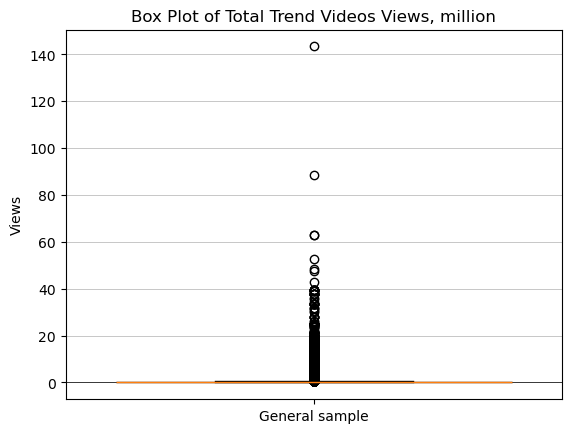

In [31]:
plt.boxplot((sample := (general_df["views"].to_numpy()/1_000_000)),
            labels=["General sample"],
            notch=False,
            vert=True,
            whis=1.5,
            widths=0.8,
            patch_artist=True)
plt.title("Box Plot of Total Trend Videos Views, million")
plt.ylabel("Views")
plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(False)
plt.gca().yaxis.grid(True, linestyle="-", linewidth=0.5)
# plt.grid(True)
plt.show()

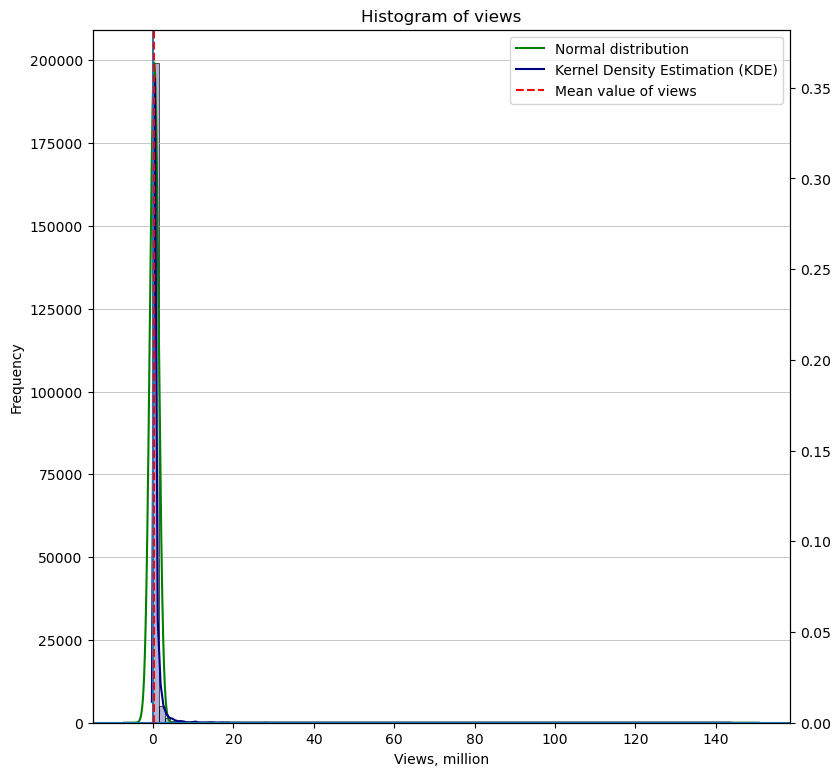

In [32]:
mean_views, sd_views, n_views = (np.mean(sample), 
               np.std(sample, ddof=1), 
               len(sample))

fig, ax = plt.subplots(figsize=(9,9))
sns.histplot(sample, 
             ax=ax, 
             kde=False,
             color="navy",
             alpha=0.3,
             edgecolor="black",
             bins=100)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, n_views)
p_y = stats.norm.pdf(x, loc=mean_views, scale=sd_views)
ax1 = ax.twinx()
ax1.plot(x, p_y, color="green", label="Normal distribution")

sns.kdeplot(sample, ax=ax1, fill=False, color="navy", label="Kernel Density Estimation (KDE)")

ax.set_xlabel("Views, million")
ax.set_ylabel("Frequency")
ax.axhline(True, color='black', linewidth=0.5)
ax.yaxis.grid(True, linestyle='-', linewidth=0.5)
ax.xaxis.grid(False)

ax1.set_ylabel(None)
ax1.axhline(False)
ax1.axvline(False)
ax1.yaxis.grid(False)
ax1.xaxis.grid(False)

plt.axvline(x=mean_views, color="red", linestyle="--", label="Mean value of views")

plt.title(f"Histogram of views")
plt.legend()
plt.show()

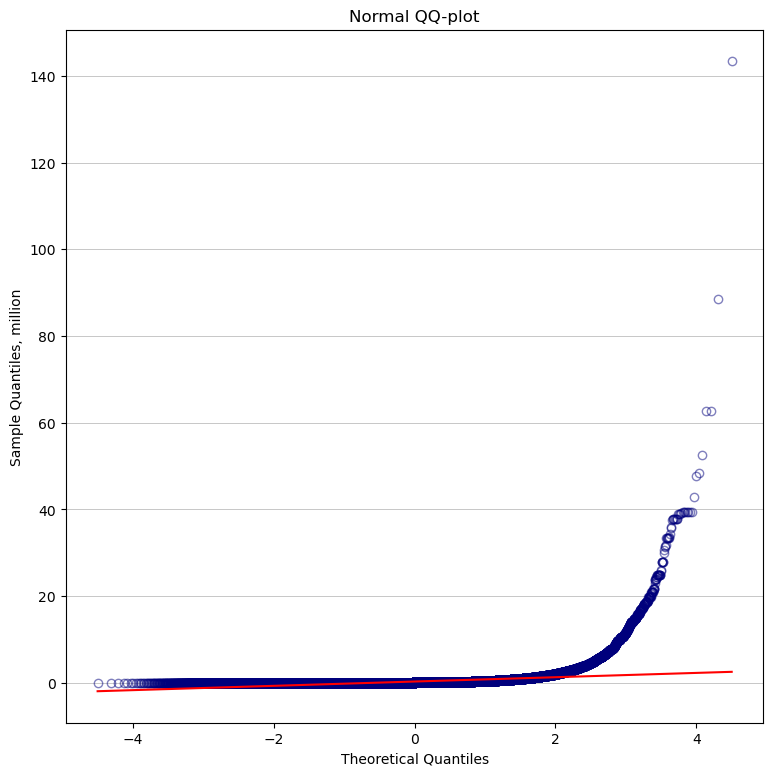

In [33]:
fig, ax = plt.subplots(figsize=(9, 9))
stats.probplot(sample, plot=ax, dist="norm")

ax.set_title("Normal QQ-plot")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles, million")
ax.yaxis.grid(True, linestyle="-", linewidth=0.5)
ax.xaxis.grid(False)

line = ax.get_lines()[0]
line.set_marker("o")
line.set_markersize(6)
line.set_markerfacecolor("none")
line.set_markeredgecolor((0, 0, 124/255, 0.5))

# plt.grid(False)
plt.show()

As seen from the histogram of view frequencies (in millions) and the QQ-plot, the sample indeed contains significant outliers, with some videos having view counts that are markedly different from the average number of views for all trending videos in the 2017-2018 period.  

I suggest examining the graphs by truncating the data to 1 million views, as beyond this threshold, clear outliers are visible, reaching up to 140 million views.

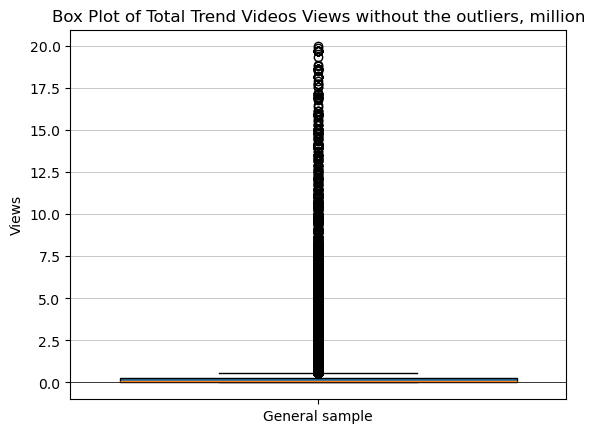

In [34]:
plt.boxplot((sample1 := (general_df[general_df["views"] <= 20_000_000]["views"].to_numpy()/1_000_000)),
            labels=["General sample"],
            notch=False,
            vert=True,
            whis=1.5,
            widths=0.8,
            patch_artist=True)
plt.title("Box Plot of Total Trend Videos Views without the outliers, million")
plt.ylabel("Views")
plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(False)
plt.gca().yaxis.grid(True, linestyle="-", linewidth=0.5)
# plt.grid(True)
plt.show()

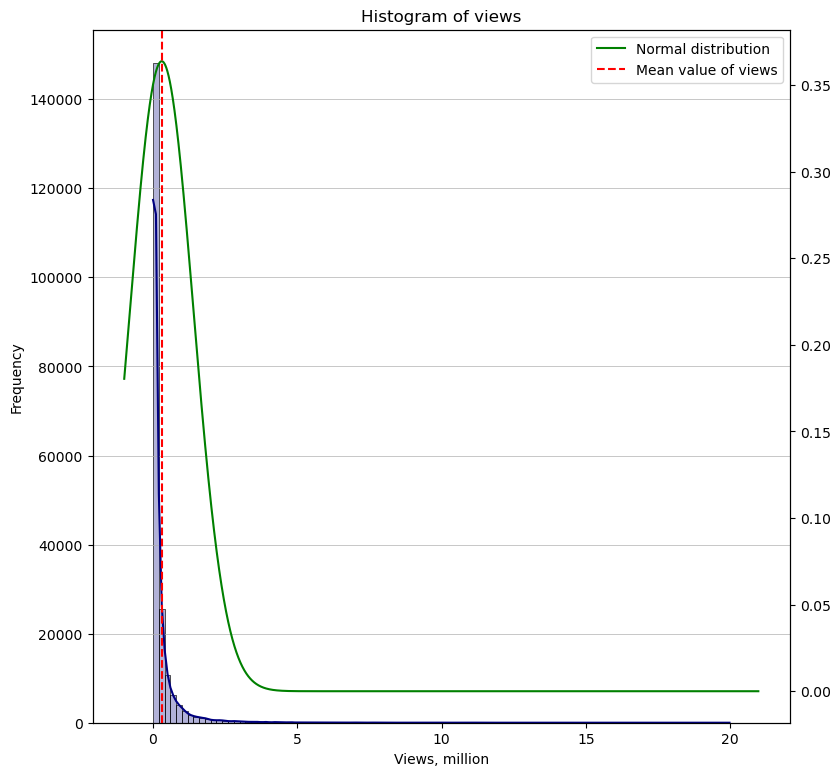

In [35]:
mean_views1, sd_views1, n_views1 = (np.mean(sample1), 
               np.std(sample1, ddof=1), 
               len(sample1))

fig, ax = plt.subplots(figsize=(9,9))
sns.histplot(sample1, 
             ax=ax, 
             kde=True,
             color="navy",
             alpha=0.3,
             edgecolor="black",
             bins=100)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, n_views)
p_y = stats.norm.pdf(x, loc=mean_views, scale=sd_views)
ax1 = ax.twinx()
ax1.plot(x, p_y, color="green", label="Normal distribution")

# sns.kdeplot(sample, ax=ax1, fill=False, color="navy", label="Kernel Density Estimation (KDE)")

ax.set_xlabel("Views, million")
ax.set_ylabel("Frequency")
ax.axhline(True, color='black', linewidth=0.5)
ax.yaxis.grid(True, linestyle='-', linewidth=0.5)
ax.xaxis.grid(False)

ax1.grid(False)

plt.axvline(x=mean_views, color="red", linestyle="--", label="Mean value of views")

plt.title(f"Histogram of views")
plt.legend()
plt.show()

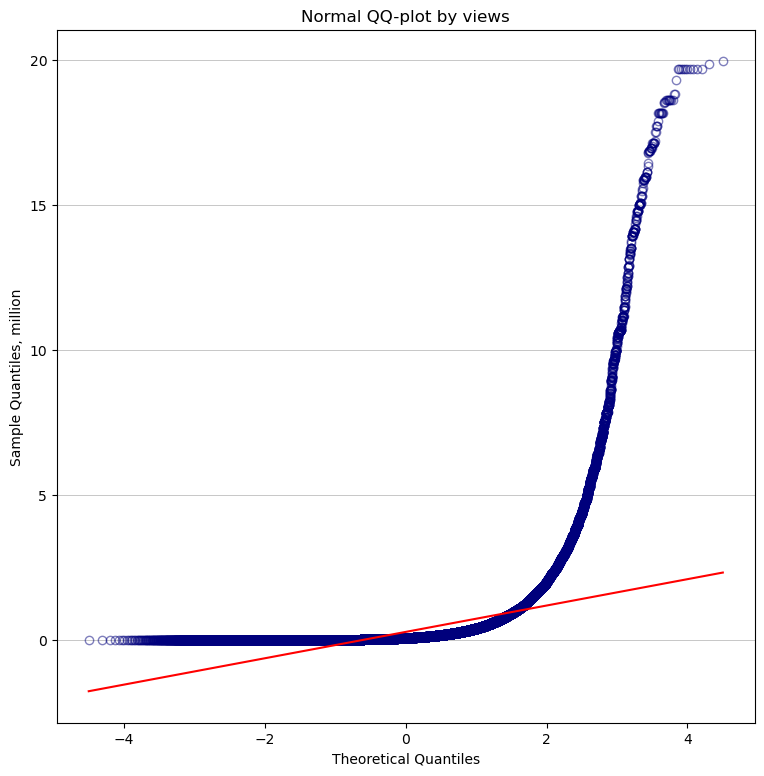

In [36]:
fig, ax = plt.subplots(figsize=(9, 9))
stats.probplot(sample1, plot=ax, dist="norm")

ax.set_title("Normal QQ-plot by views")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles, million")
ax.yaxis.grid(True, linestyle="-", linewidth=0.5)
ax.xaxis.grid(False)

line = ax.get_lines()[0]
line.set_marker("o")
line.set_markersize(6)
line.set_markerfacecolor("none")
line.set_markeredgecolor((0, 0, 124/255, 0.5))

# plt.grid(False)
plt.show()

As evident from the updated graphs, the distribution of views is far from normal. The mean is approximately zero, and for a normal distribution, data below zero would be necessary, which is not possible for view counts. There is a clear asymmetry with the presence of unimodality.  

To assess the normality of the distribution, it would be logical to perform the <strong><u>Shapiro-Wilk test</u></strong>. By default, the alpha value is set to 0.05 ($\alpha = 0.05$), and the null hypothesis of this test indicates that the distribution is normal.

In [37]:
stats_views, p_v_views = stats.shapiro(sample)
print("The results of the Shapiro-Wilk test")
print(f"statistic = {stats_views:.4f}, p-value = {p_v_views:.10f}")

The results of the Shapiro-Wilk test
statistic = 0.2054, p-value = 0.0000000000


c:\Users\User\Anaconda\envs\mainenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 207143.
  res = hypotest_fun_out(*samples, **kwds)


Due to the large number of observations in the sample, the interpreter returns an error related to the 5,000-observation limit (current number of observations is 207,143). However, the returned value indicates that the current distribution is likely non-normal.

Given the presence of outliers, it is important to apply a non-parametric alternative to the t-test, such as the <strong><u>Mann-Whitney U-test</u></strong>. This test will convert all our data into a ranking scale and is less affected by outliers. But this one used only for two samples (which are with outliers).

I suggest examining the QQ-plots for each country.  
To ensure that none of our data truly follows a normal distribution.

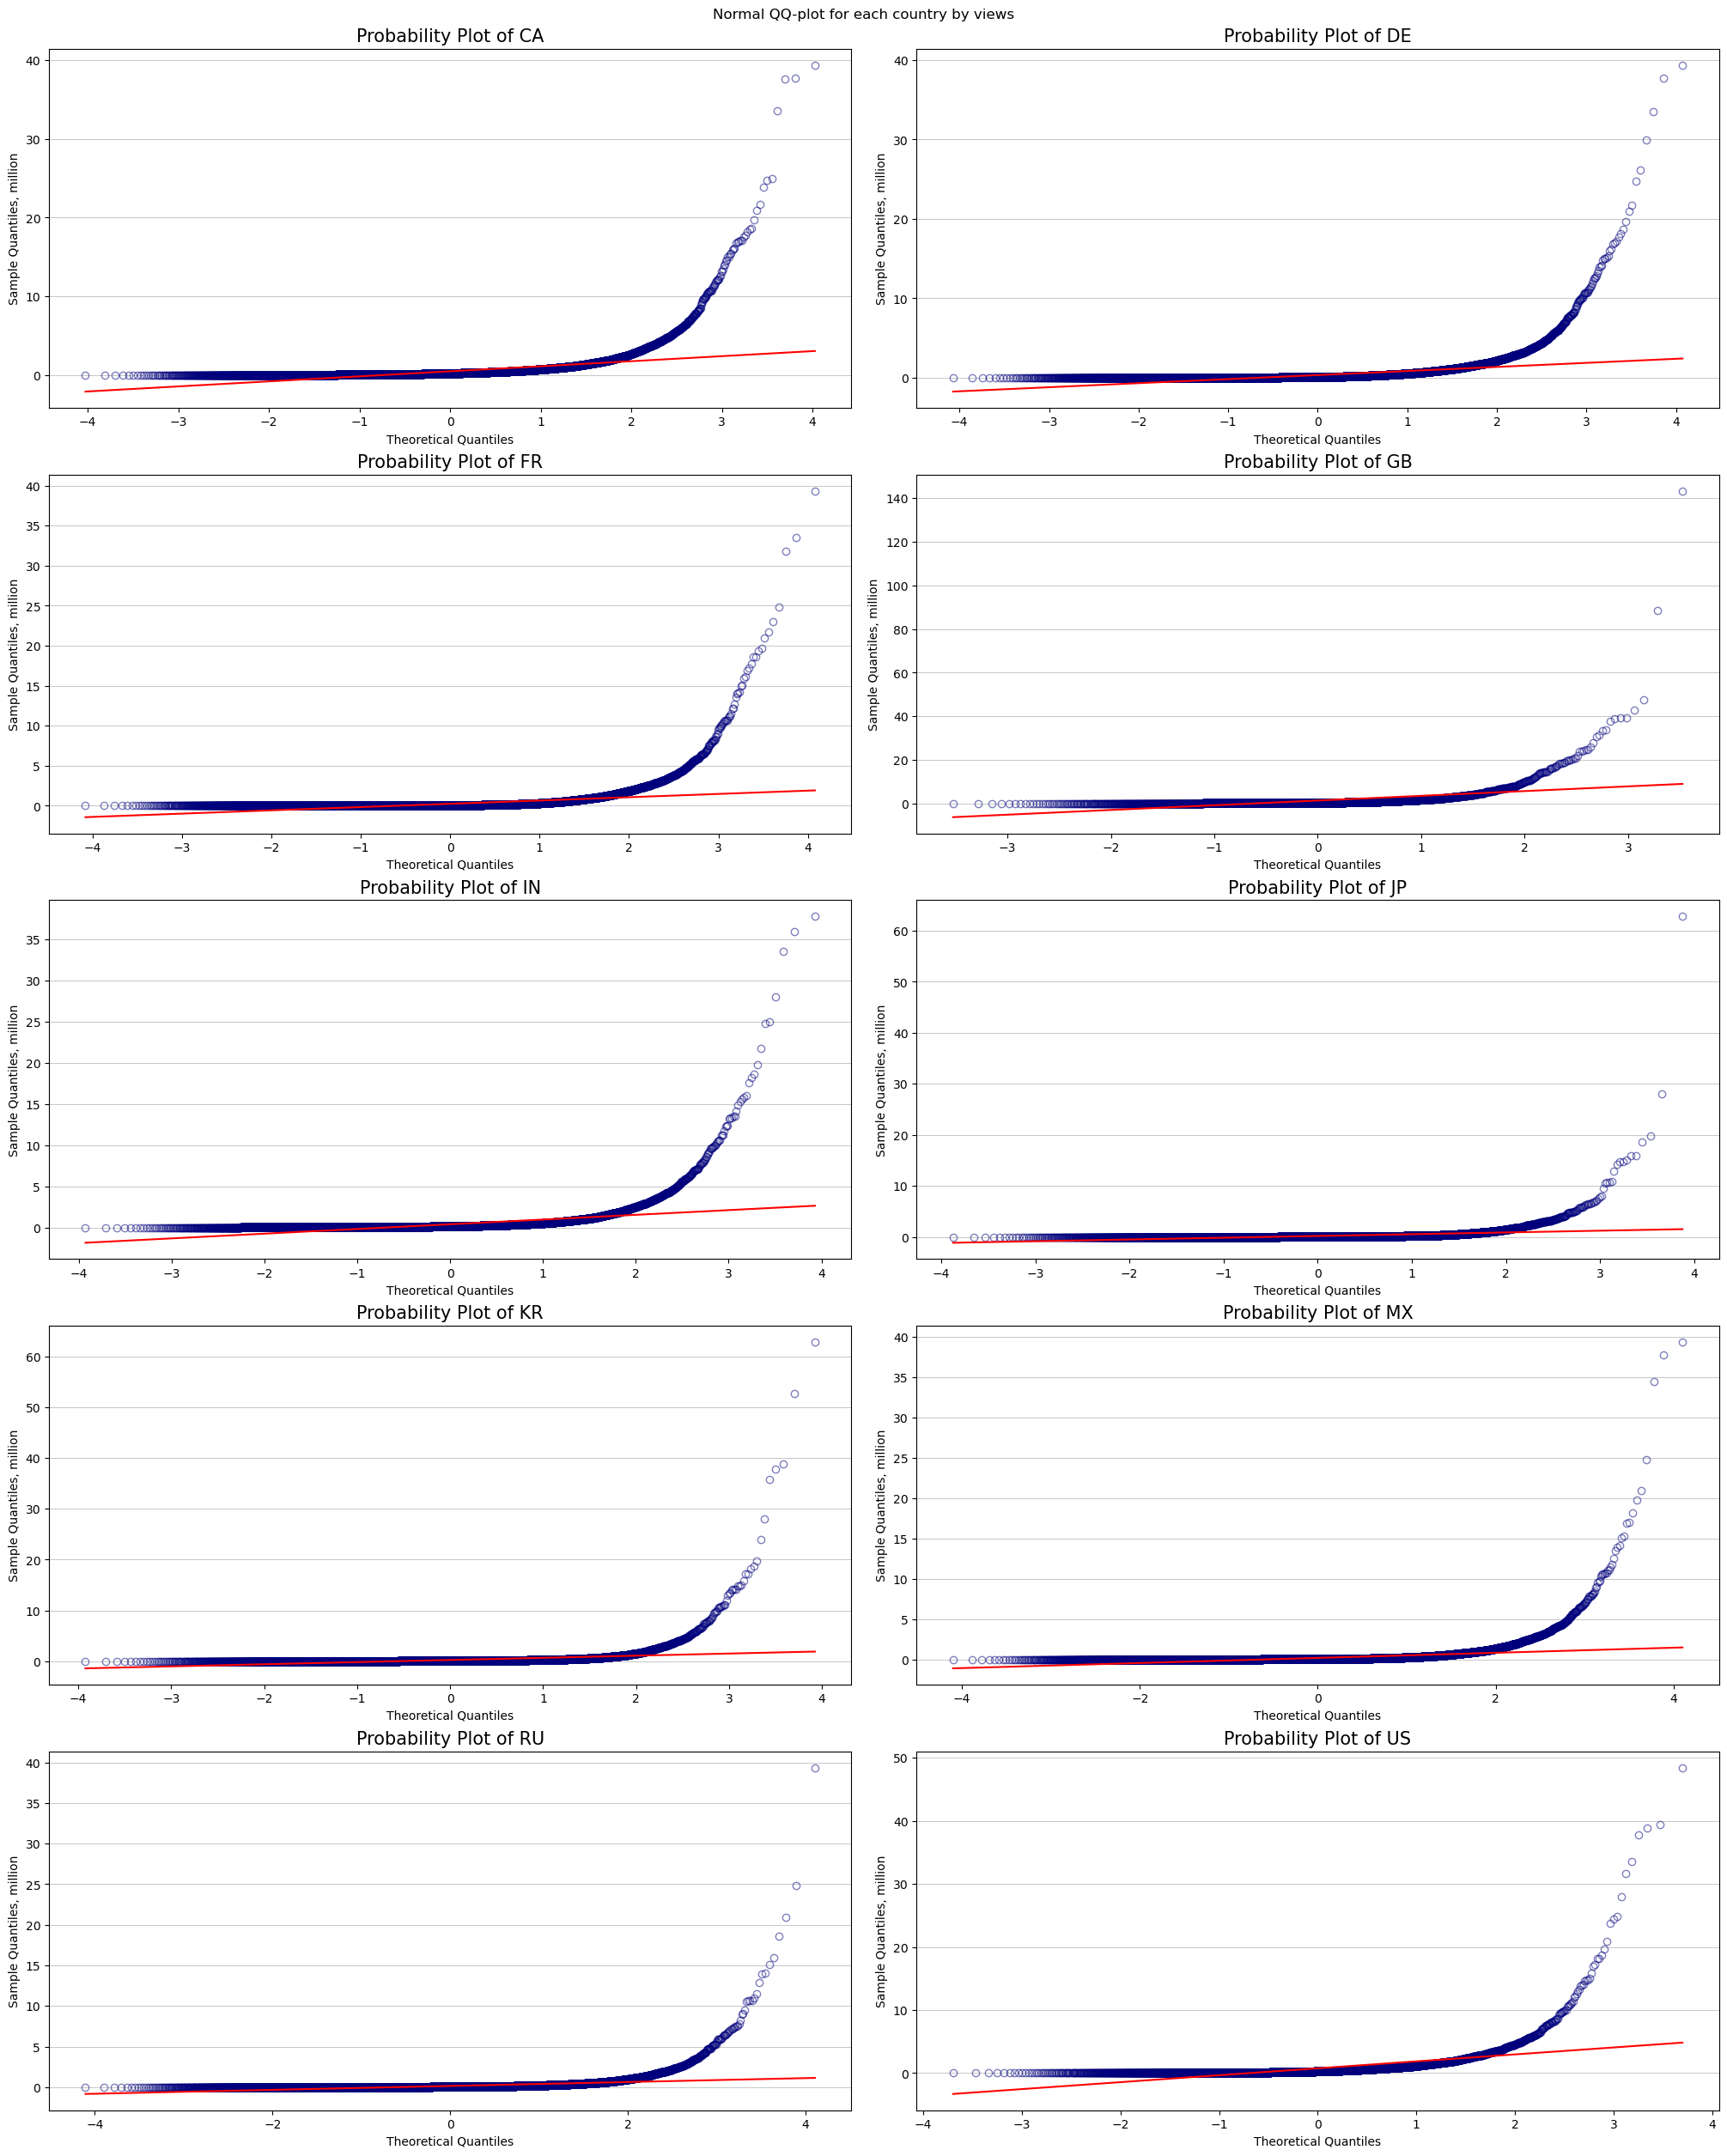

In [38]:
def grouping_by_country_array_of_views(df: pd.DataFrame) -> np.array:
    return df["views"].to_numpy() / 1_000_000
grouped_by_country_array_of_views = general_df.groupby(by="country", as_index=True).apply(grouping_by_country_array_of_views, include_groups=False).reset_index()
grouped_by_country_array_of_views.columns = ("country", "Views")
fig, axs = plt.subplots(
    ncols=2,
    nrows=(math.ceil(grouped_by_country_array_of_views.shape[0] / 2)),
    figsize=(20, 25),
    layout="constrained"
)

row = col = 0
for index, rows in grouped_by_country_array_of_views.iterrows():
    stats.probplot(rows["Views"], plot=(new_ax := axs[row][col]), dist="norm")
    
    new_ax.set_title(f"Probability Plot of {rows["country"]}", size=15)
    new_ax.set_xlabel("Theoretical Quantiles")
    new_ax.set_ylabel("Sample Quantiles, million")
    new_ax.yaxis.grid(True, linestyle="-", linewidth=0.5)
    new_ax.xaxis.grid(False)

    line = new_ax.get_lines()[0]
    line.set_marker("o")
    line.set_markersize(6)
    line.set_markerfacecolor("none")
    line.set_markeredgecolor((0, 0, 124/255, 0.5))

    if col == 1:
        row += 1; col = 0
    else:
        col += 1


fig.suptitle("Normal QQ-plot for each country by views")
plt.show()

Yes, indeed, outliers are present in each sample, indicating the presence of extreme high values of the parameter (<i>views</i>), which are very uncommon in a normal distribution.

Well, now we have confirmed this for further analysis.

## 2.3 The most popular trends

Therefore, I suggest examining which categories users prefer based on their frequency in the trending videos sample (both overall and for each country separately). Let’s create a histogram of the frequencies by category.

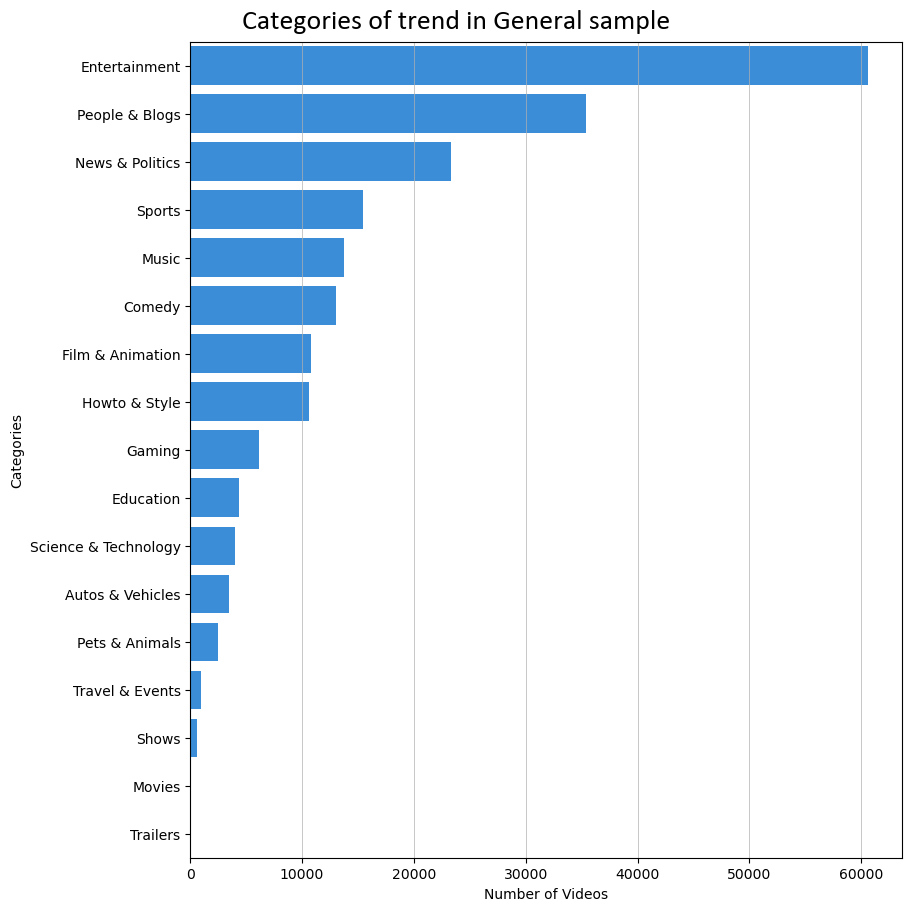

In [39]:
fig, axs = plt.subplots(figsize=(9,9),
            layout='constrained'
)
df = (general_df.
      groupby(by="category", as_index=False)
      .agg(Numbers=("category", "count"))
      .rename(columns={"category": "Category"}))
df.sort_values(by="Numbers", ascending=False, inplace=True)
sns.barplot(
    data=df,
    x="Numbers",
    y="Category",
    ax=axs,
    orient="h",
    saturation=1,
    width=0.80,
    color="#3A8DD6",
    alpha=1,
    native_scale=True
)
sns.set_style({
    "grid.color": "black",
    "axes.edgecolor": "black",
    "axes.grid": True,
    "axes.axisbelow": True,

    "axes.spines.left": False,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,

    "xtick.bottom": False,
    "xtick.top": False,
    "ytick.left": False,
    "ytick.right": False,

    "font_family": "calibri"
})

axs.set_ylabel("Categories")
axs.set_xlabel("Number of Videos")
axs.xaxis.grid(True, linestyle='-', linewidth=0.5)
axs.yaxis.grid(False)

# new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

if col == 1:
    row += 1; col = 0
else:
    col += 1

fig.suptitle(f"Categories of trend in General sample", size=20, font="Calibri")
plt.show()

As can be observed from the hist above, most trending videos fall into the Entertainment category, followed by People & Blogs in the second position.  
However, the third position is occupied by the Politics & News category.  

Based on this, it can be inferred that YouTube is primarily used by users for relaxation and entertainment, but also for staying informed about current political and other news-related events.

Let's check it for each country

In [40]:
def grouping_by_country_videos_number(df: pd.DataFrame) -> dict:
    df = df.groupby(by="category", as_index=False).agg(count=("category", "size"))
    our_dict = dict()
    for index, row in df.iterrows():
        our_dict[row["category"]] = row["count"]
    return our_dict

grouped_by_country_videos_number = general_df.groupby(by="country", as_index=True).apply(grouping_by_country_videos_number, include_groups=False).reset_index()
grouped_by_country_videos_number.columns = ("country", "dict")
display(grouped_by_country_videos_number)

,country,dict
0,CA,"{'Autos & Vehicles': 248, 'Comedy': 1946, 'Edu..."
1,DE,"{'Autos & Vehicles': 674, 'Comedy': 1756, 'Edu..."
2,FR,"{'Autos & Vehicles': 591, 'Comedy': 2597, 'Edu..."
3,GB,"{'Autos & Vehicles': 14, 'Comedy': 204, 'Educa..."
4,IN,"{'Autos & Vehicles': 33, 'Comedy': 1116, 'Educ..."
5,JP,"{'Autos & Vehicles': 211, 'Comedy': 402, 'Educ..."
6,KR,"{'Autos & Vehicles': 65, 'Comedy': 829, 'Educa..."
7,MX,"{'Autos & Vehicles': 220, 'Comedy': 1290, 'Edu..."
8,RU,"{'Autos & Vehicles': 1349, 'Comedy': 2350, 'Ed..."
9,US,"{'Autos & Vehicles': 70, 'Comedy': 547, 'Educa..."


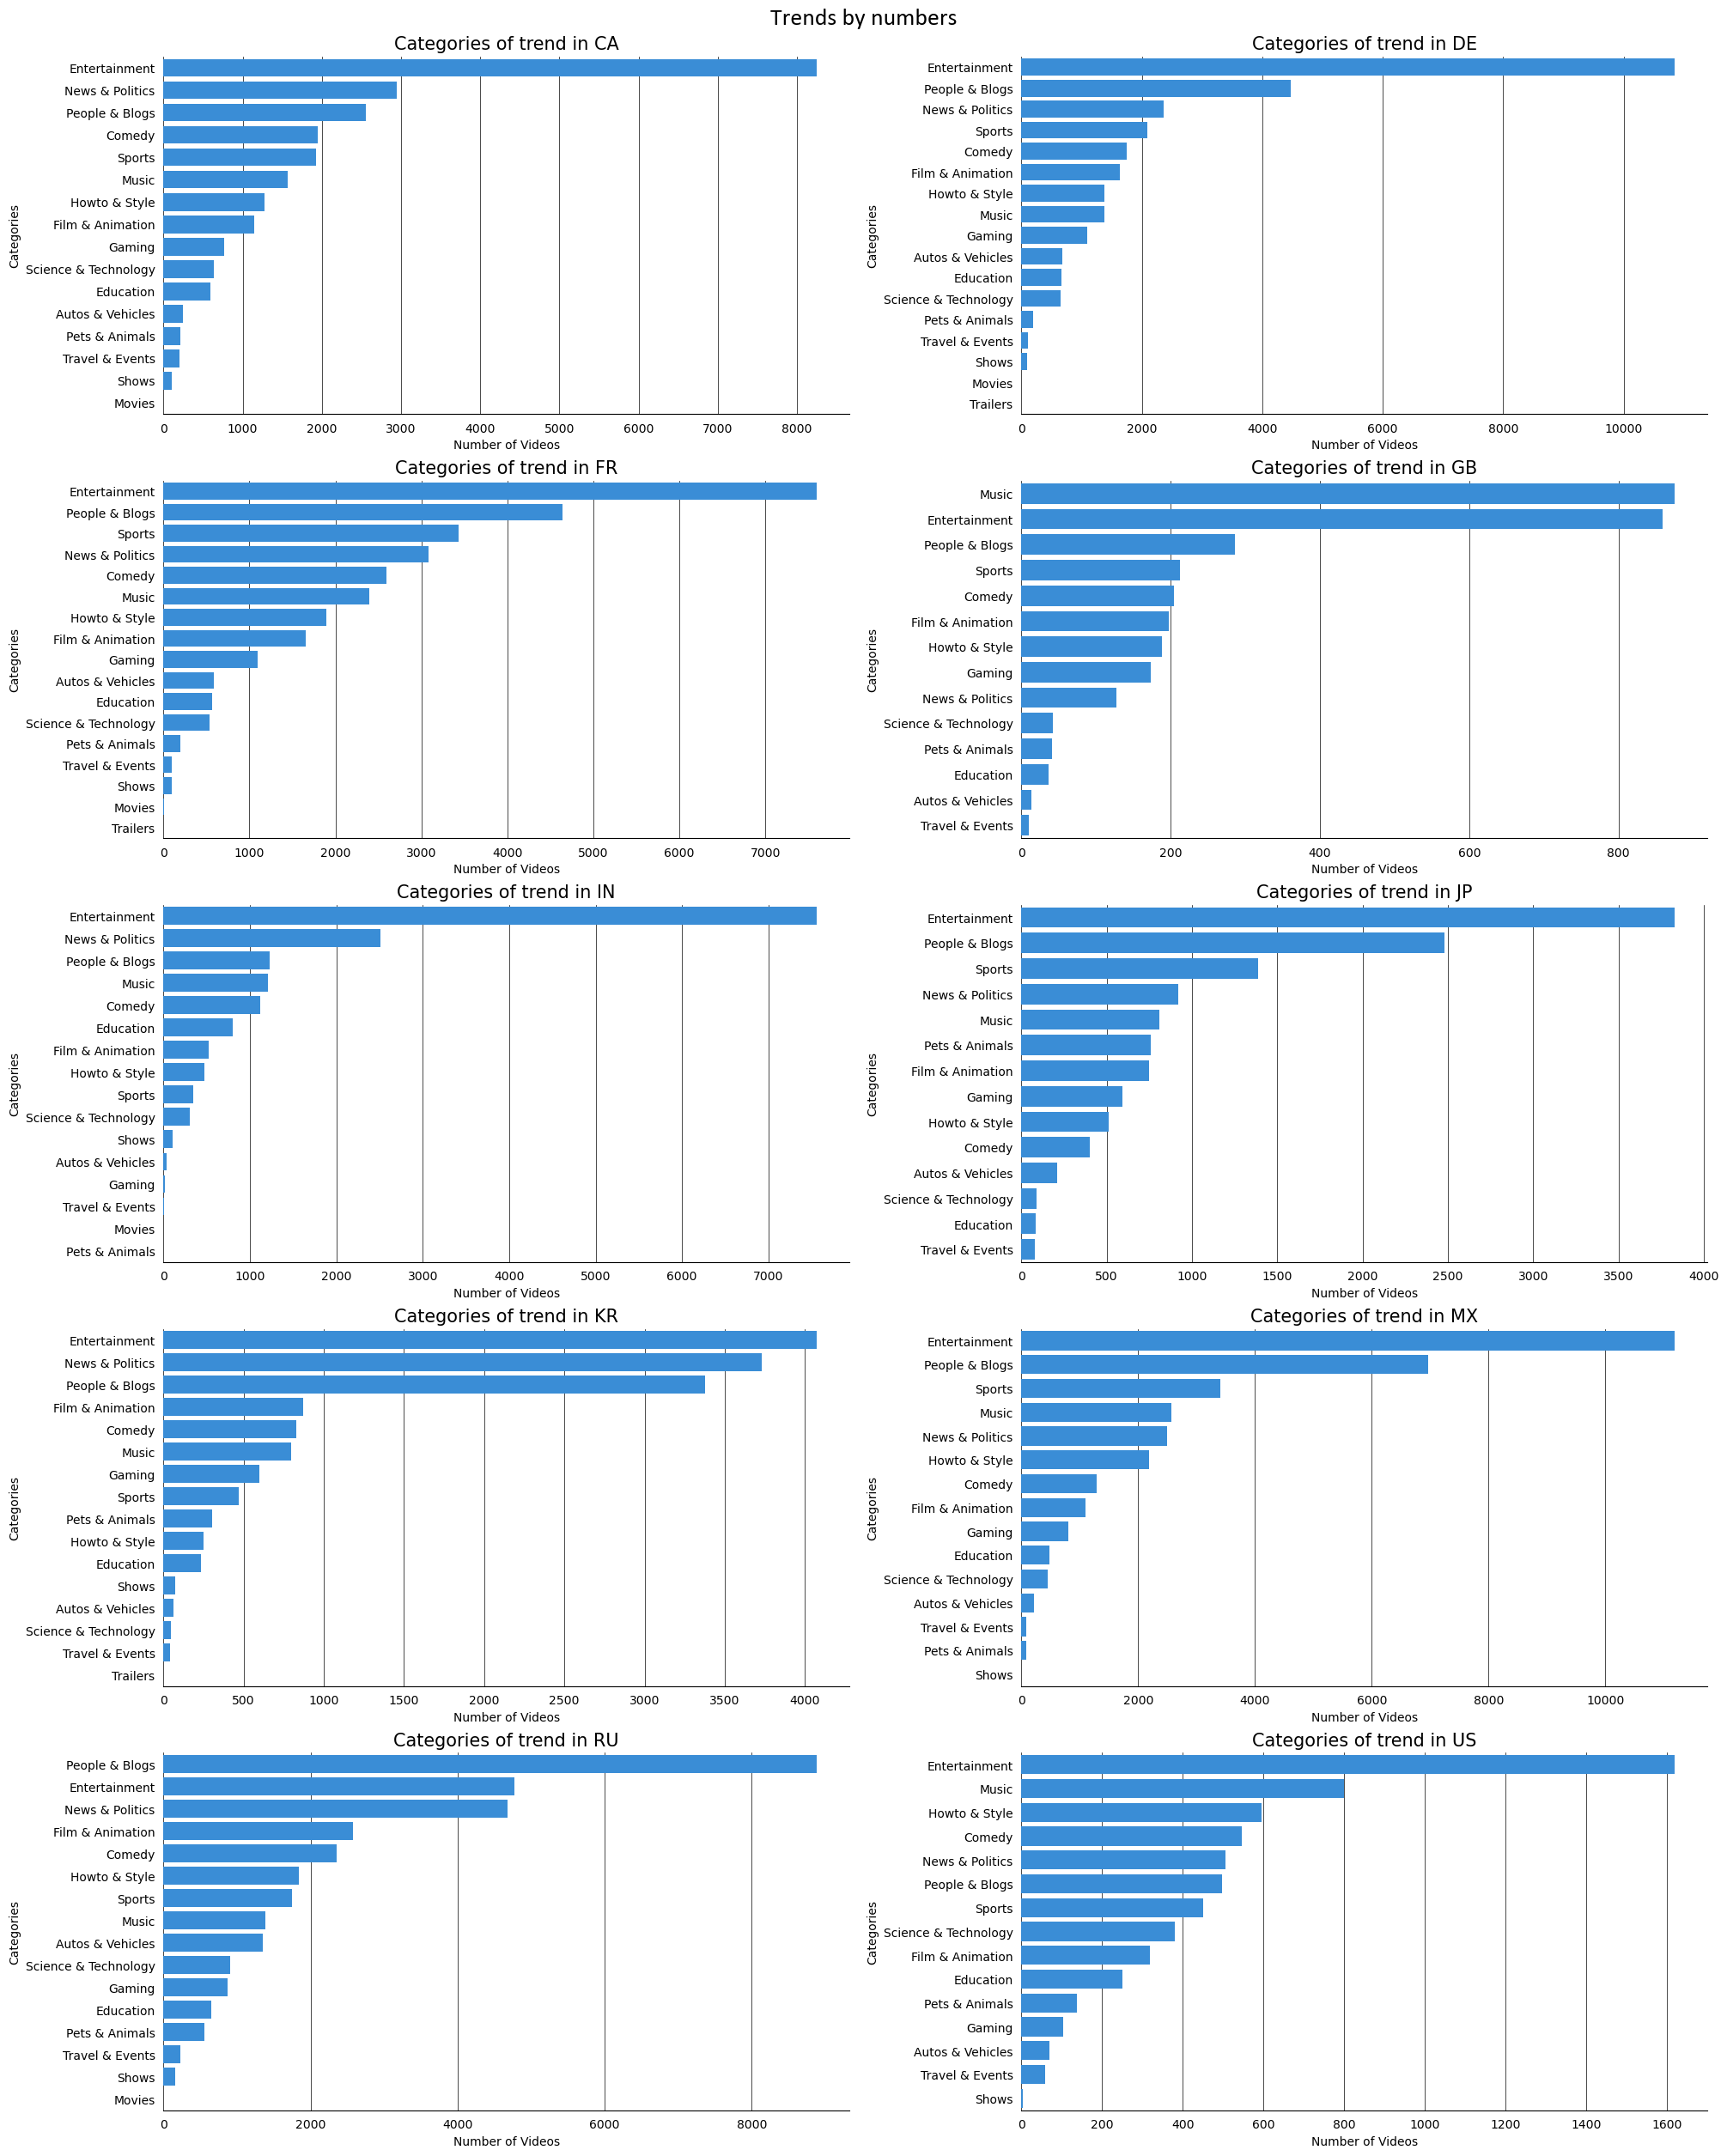

In [41]:
fig, axs = plt.subplots(
    ncols=2,
    nrows=(math.ceil(len(grouped_by_country_videos_number) / 2)),
    figsize=(20,25),
    layout='constrained'
)
row = col = 0
for index, rows in grouped_by_country_videos_number.iterrows():
    df = pd.DataFrame(list(rows["dict"].items()), columns=["Category", "Numbers"])
    df.sort_values(by="Numbers", ascending=False, inplace=True)
    sns.barplot(
        data=df,
        x="Numbers",
        y="Category",
        ax=(new_ax := axs[row][col]),
        orient="h",
        saturation=1,
        width=0.80,
        color="#3A8DD6",
        alpha=1,
        native_scale=True
    )
    sns.set_style({
        "grid.color": "black",
        "axes.edgecolor": "black",
        "axes.grid": True,
        "axes.axisbelow": True,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "font_family": "calibri"
    })

    new_ax.set_title(f"Categories of trend in {str(rows["country"])}", size=15)
    new_ax.set_ylabel("Categories")
    new_ax.set_xlabel("Number of Videos")
    new_ax.xaxis.grid(True, linestyle='-', linewidth=0.5)
    new_ax.yaxis.grid(False)

    # new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

    if col == 1:
        row += 1; col = 0
    else:
        col += 1

fig.suptitle("Trends by numbers", size=20, font="Calibri")
plt.show()

Based on the country-specific analysis, it is evident that the overall sample reflects the trends seen in each individual country. However, South Korea shows a notable interest in both Entertainment and Politics & News, which may indicate a high level of public anxiety.

In 2018, a summit between Kim Jong-un and Moon Jae-in took place, marking the first inter-Korean summit in over a decade. During the meeting, declarations were signed concerning peace efforts, improved relations, and the denuclearization of the Korean Peninsula.

Additionally, in September of the same year, a second summit was held in Pyongyang. This summit focused on continuing denuclearization efforts and improving inter-Korean relations. Leaders also signed agreements on joint economic projects and humanitarian aid.

Furthermore, the trade deal with the U.S. should be considered: in October 2018, South Korea and the U.S. updated their free trade agreement (KORUS FTA). This agreement addressed various trade issues and reflected both parties' commitment to strengthening economic ties.

Besides political events, South Korea hosted the Winter Olympics in PyeongChang in February 2018. This event was significant for the country, showcasing its organizational capabilities. The Olympics also served as a platform for rapprochement between North and South Korea, with a delegation from North Korea participating and joint events being held. Although the Sports category does not stand out prominently among the categories mentioned above, the Winter Olympics could have also featured in the news category.

## 2.4 The most popular videos

But what about the most popular videos? Again, in terms of views.  

Let’s look at the most popular videos, their categories, and the number of likes/dislikes they have.

In [42]:
columns_list = ["views", "likes", "dislikes"]
our_dict = {
    k: ([format_number(num) for num in v]) if k in columns_list else v 
    for k, v in (general_df.sort_values(by="views", ascending=False, inplace=False)
                            .iloc[:5][["category", "country", "views", "likes", "dislikes", "channel_title", "title"]]
                            .to_dict(orient="list").items())                                                                              
    }

print("Common the most popular videos")
print(tabulate.tabulate(our_dict, headers="keys", tablefmt="fancy_grid", stralign="left", numalign="right"))

Common the most popular videos
╒═══════════════╤═══════════╤═════════════╤═══════════╤════════════╤═══════════════════╤══════════════════════════════════════════════════════╕
│ category      │ country   │ views       │ likes     │ dislikes   │ channel_title     │ title                                                │
╞═══════════════╪═══════════╪═════════════╪═══════════╪════════════╪═══════════════════╪══════════════════════════════════════════════════════╡
│ Music         │ GB        │ 143 408 235 │ 2 686 169 │ 137 938    │ LuisFonsiVEVO     │ Luis Fonsi, Demi Lovato - Échame La Culpa            │
├───────────────┼───────────┼─────────────┼───────────┼────────────┼───────────────────┼──────────────────────────────────────────────────────┤
│ Music         │ GB        │ 88 568 646  │ 1 185 357 │ 99 361     │ BeckyGVEVO        │ Becky G, Natti Natasha - Sin Pijama (Official Video) │
├───────────────┼───────────┼─────────────┼───────────┼────────────┼───────────────────┼─────────────────

As we have previously observed, the highest number of views for trending videos comes from the United Kingdom, with a significant portion falling into the Music category. It appears that pop music is so catchy that people are willing to listen to it 143 million times."

Incidentally, these videos are indeed the outliers in the distribution of view counts.

In [43]:
def grouping_by_country_most_views(df: pd.DataFrame) -> dict:
    df["ranked"] = df["views"].rank(axis=0, method="dense", na_option="bottom", ascending=False)
    df = df.loc[df["ranked"] <= 5, ["category", "views", "likes", "dislikes", "channel_title", "title"]].sort_values(by="views", ascending=False)
    return df.to_dict(orient="list")

grouped_by_country_most_views = general_df.groupby(by="country", as_index=True).apply(grouping_by_country_most_views, include_groups=False).reset_index()
grouped_by_country_most_views.columns=["country", "dict_of_views"]

In [44]:
for index, row in grouped_by_country_most_views.iterrows():
    our_dict = {k: ([format_number(num) for num in v]) if k in columns_list else v for k, v in row["dict_of_views"].items()}
    print(row["country"])
    print(tabulate.tabulate(our_dict, headers="keys", tablefmt="fancy_grid", stralign="left", numalign="right"))

CA
╒═══════════════╤════════════╤═══════════╤════════════╤══════════════════════╤════════════════════════════════════════════════════════════════════╕
│ category      │ views      │ likes     │ dislikes   │ channel_title        │ title                                                              │
╞═══════════════╪════════════╪═══════════╪════════════╪══════════════════════╪════════════════════════════════════════════════════════════════════╡
│ Music         │ 39 349 927 │ 3 880 074 │ 72 707     │ ibighit              │ BTS (방탄소년단) 'FAKE LOVE' Official MV                           │
├───────────────┼────────────┼───────────┼────────────┼──────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Entertainment │ 37 736 281 │ 1 735 931 │ 21 972     │ Marvel Entertainment │ Marvel Studios' Avengers: Infinity War Official Trailer            │
├───────────────┼────────────┼───────────┼────────────┼──────────────────────┼────────────────────────────────────

It can be observed that it is precisely music videos that gather the highest number of views.

I believe that when we analyze the categories by view counts, we will find that music videos receive the highest number of views, despite being significantly fewer in quantity compared to entertainment, news, or blog categories."

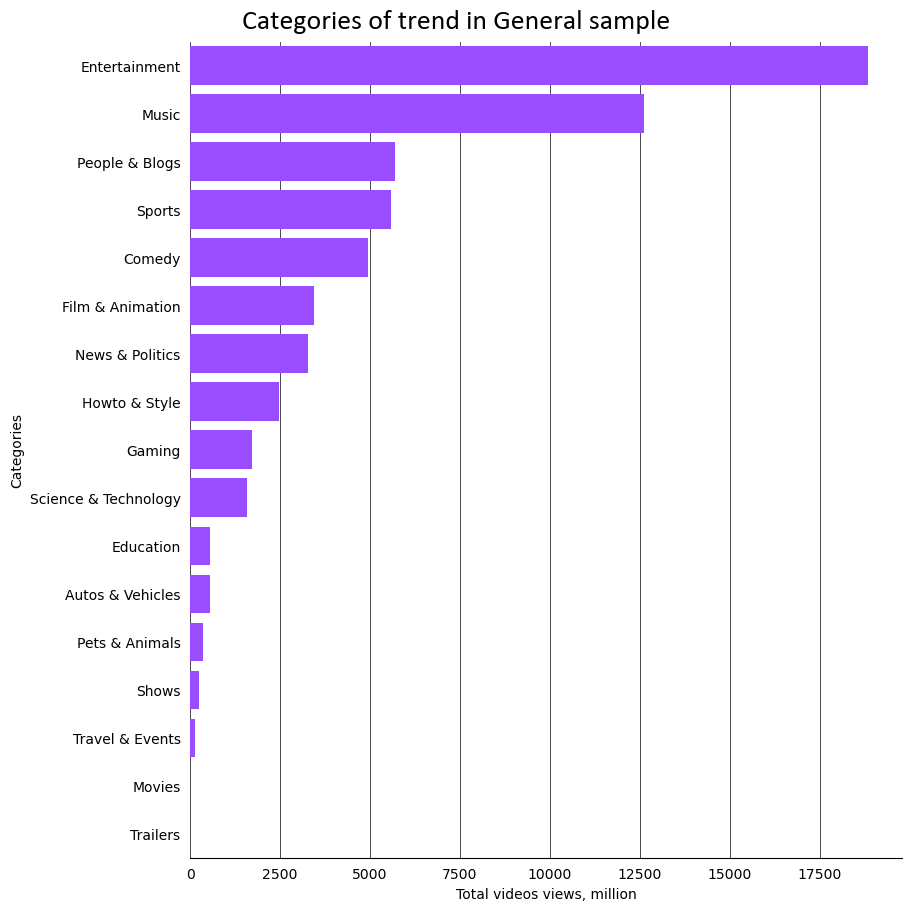

In [45]:
fig, axs = plt.subplots(figsize=(9,9),
            layout='constrained'
)
df = (general_df
      .groupby(by="category", as_index=False)
      .agg(Sum_of_views=("views", lambda x: x.sum() / 1_000_000))
      .rename(columns={"category": "Category"}))
df.sort_values(by="Sum_of_views", ascending=False, inplace=True)
sns.barplot(
    data=df,
    x="Sum_of_views",
    y="Category",
    ax=axs,
    orient="h",
    saturation=1,
    width=0.80,
    color="#994dfe",
    alpha=1,
    native_scale=True
)
sns.set_style({
    "grid.color": "black",
    "axes.edgecolor": "black",
    "axes.grid": True,
    "axes.axisbelow": True,

    "axes.spines.left": False,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,

    "xtick.bottom": False,
    "xtick.top": False,
    "ytick.left": False,
    "ytick.right": False,

    "font_family": "calibri"
})

axs.set_ylabel("Categories")
axs.set_xlabel("Total videos views, million")
axs.xaxis.grid(True, linestyle='-', linewidth=0.5)
axs.yaxis.grid(False)

# new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

if col == 1:
    row += 1; col = 0
else:
    col += 1

fig.suptitle(f"Categories of trend in General sample", size=20, font="Calibri")
plt.show()

<strong>And yet, quantity surpassed quality</strong>.  
From the previous histogram ranking video categories by their number, there were about 60,000 entertainment videos and around 15,000 music videos in the overall dataset. This means there are approximately 4-5 entertainment videos for every music video.  

Despite music videos being more frequently among the most viewed, the total sum of views for music videos did not exceed that of entertainment videos.

Let's examine the situation by country.

In [46]:
def grouping_by_country_sum_of_views_million(df: pd.DataFrame) -> dict:
    df = df.groupby(by="category", as_index=False).agg(count=("views", lambda x: x.sum() / 1_000_000))
    our_dict = dict()
    for index, row in df.iterrows():
        our_dict[row["category"]] = row["count"]
    return our_dict

grouped_by_country_sum_of_views_million = general_df.groupby(by="country", as_index=True).apply(grouping_by_country_sum_of_views_million, include_groups=False).reset_index()
grouped_by_country_sum_of_views_million.columns = ("country", "dict")
display(grouped_by_country_sum_of_views_million)

,country,dict
0,CA,"{'Autos & Vehicles': 83.092413, 'Comedy': 1080..."
1,DE,"{'Autos & Vehicles': 110.358447, 'Comedy': 851..."
2,FR,"{'Autos & Vehicles': 31.031948, 'Comedy': 692...."
3,GB,"{'Autos & Vehicles': 8.987658, 'Comedy': 199.9..."
4,IN,"{'Autos & Vehicles': 6.297064, 'Comedy': 465.3..."
5,JP,"{'Autos & Vehicles': 10.478157, 'Comedy': 130...."
6,KR,"{'Autos & Vehicles': 4.903977, 'Comedy': 209.5..."
7,MX,"{'Autos & Vehicles': 24.074135, 'Comedy': 383...."
8,RU,"{'Autos & Vehicles': 230.168094, 'Comedy': 499..."
9,US,"{'Autos & Vehicles': 28.445164, 'Comedy': 422...."


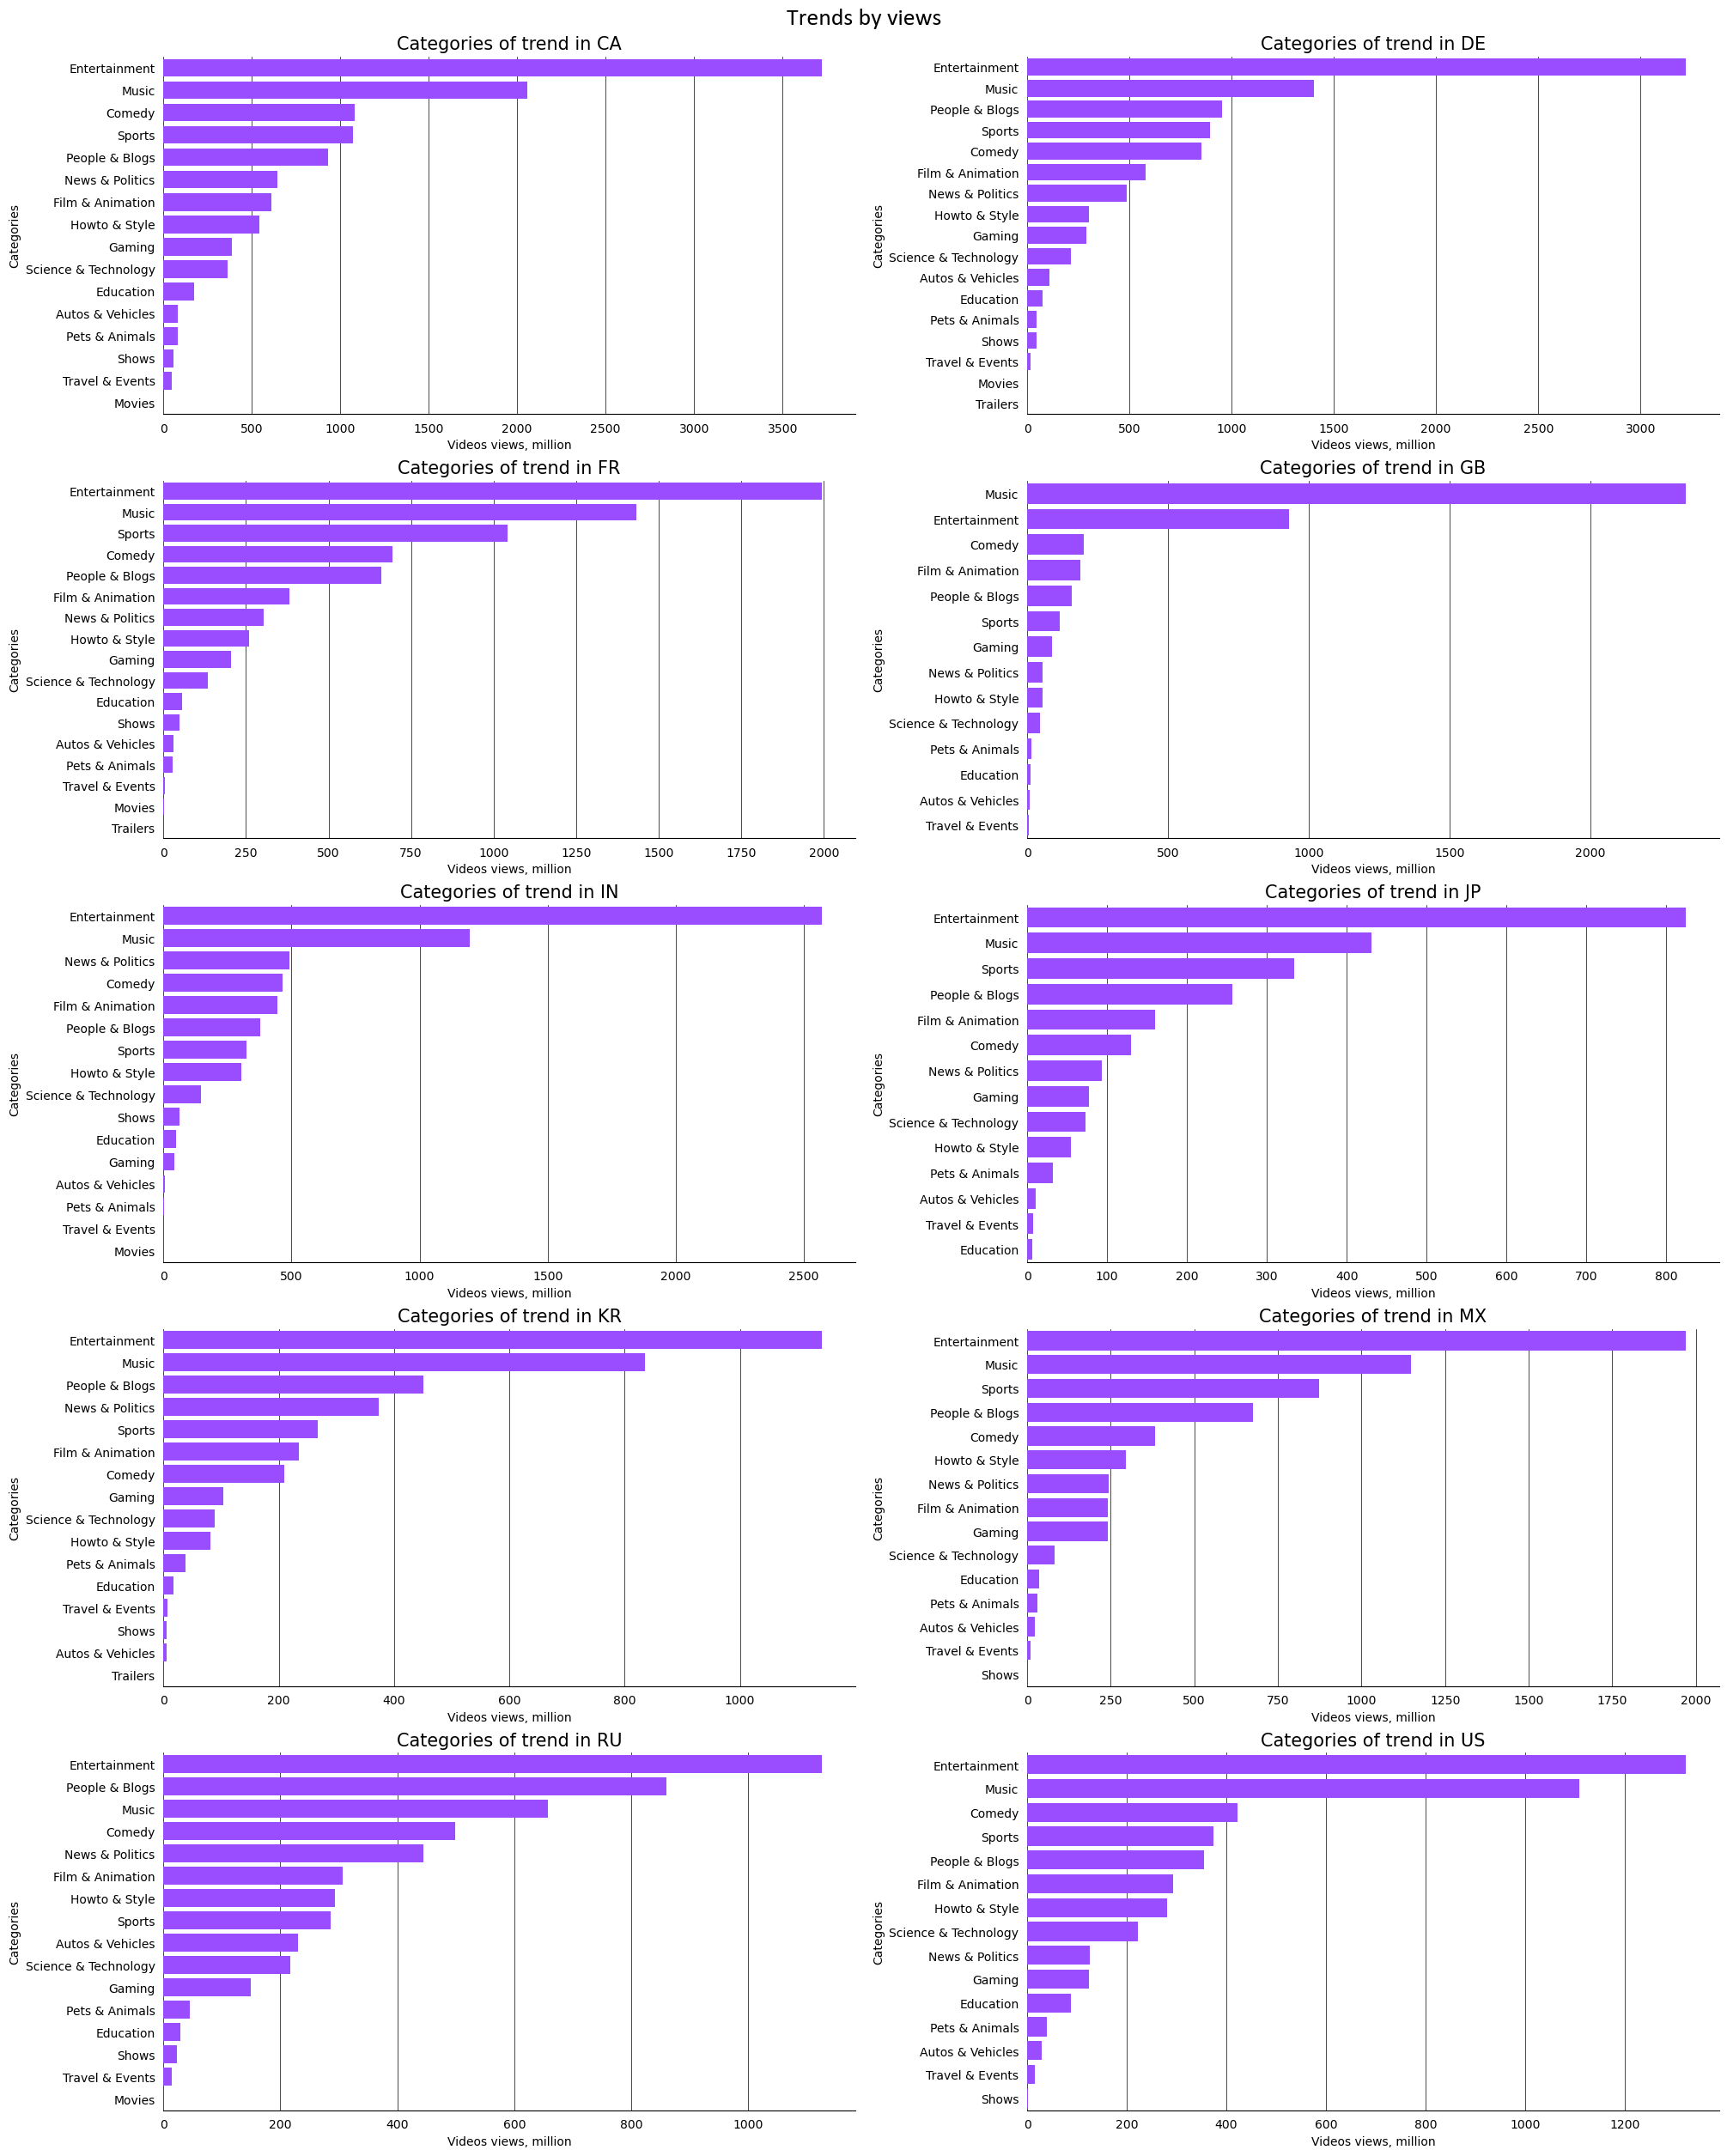

In [47]:
fig, axs = plt.subplots(
    ncols=2,
    nrows=(math.ceil(len(grouped_by_country_sum_of_views_million) / 2)),
    figsize=(20,25),
    layout='constrained'
)
row = col = 0
for index, rows in grouped_by_country_sum_of_views_million.iterrows():
    df = pd.DataFrame(list(rows["dict"].items()), columns=["Category", "Views"])
    df.sort_values(by="Views", ascending=False, inplace=True)
    sns.barplot(
        data=df,
        x="Views",
        y="Category",
        ax=(new_ax := axs[row][col]),
        orient="h",
        saturation=1,
        width=0.80,
        color="#994dfe",
        alpha=1,
        native_scale=True
    )
    sns.set_style({
        "grid.color": "black",
        "axes.edgecolor": "black",
        "axes.grid": True,
        "axes.axisbelow": True,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "font_family": "calibri"
    })

    new_ax.set_title(f"Categories of trend in {str(rows["country"])}", size=15)
    new_ax.set_ylabel("Categories")
    new_ax.set_xlabel("Videos views, million")
    new_ax.xaxis.grid(True, linestyle='-', linewidth=0.5)
    new_ax.yaxis.grid(False)

    # new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

    if col == 1:
        row += 1; col = 0
    else:
        col += 1

fig.suptitle("Trends by views", size=20, font="Calibri")
plt.show()

It is worth noting that the most popular music videos by views appeared in the trending lists of the United Kingdom.  
In the UK, the Music category, in terms of total views, has surpassed the Entertainment category.  

This suggests that people in the UK truly enjoy amusement, or perhaps they have a well-developed musical taste.

## 2.5 One-Way ANOVA

We have a DataFrame with trending videos from different countries as well as from each country individually.  
I propose we use one-way ANOVA to determine if there is a statistically significant difference between the overall sample and the samples from individual countries through multiple comparisons. The parameter under study will be the number of views.  

Although we previously established that the distribution of the number of views in the overall sample is not normal, we can use the <strong><u>Mann-Whitney U test</u></strong>, a non-parametric alternative to the <strong>t-test</strong>, in the presence of outliers.

To begin with, given that we lack a normal distribution, we will use the Central Limit Theorem to detect differences between the mean of all sample means (by country) and the overall mean.

General mean value of views = 300 425.73
General sd of views = 1 096 662.23

Mean value of mean sample = 427 499.92
SE of mean sample = 354 045.61


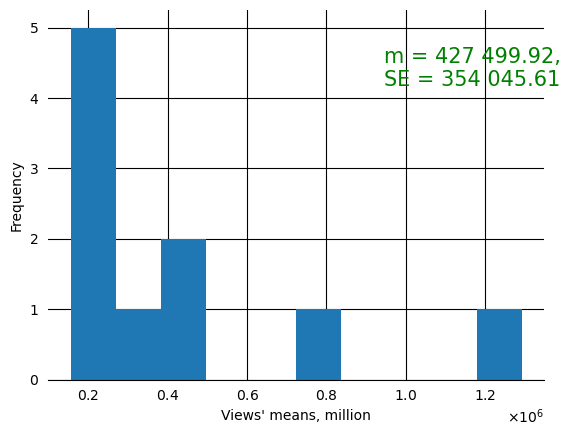

In [48]:
print(f"General mean value of views = {format_number(round(general_df["views"].mean(), 2))}")
print(f"General sd of views = {format_number(round(general_df["views"].std(ddof=1), 2))}", end="\n\n")

# at the past time views of each video was be devided by one million
# now let't take original numbers of views
def grouping_by_country_array_of_views(df: pd.DataFrame) -> np.array:
    return df["views"].to_numpy()
grouped_by_country_array_of_views = general_df.groupby(by="country", as_index=True).apply(grouping_by_country_array_of_views, include_groups=False).reset_index()
grouped_by_country_array_of_views.columns = ("country", "views")

sample_of_means = [row["views"].mean() for index, row in grouped_by_country_array_of_views.iterrows()]
print(f"Mean value of mean sample = {(x1 := (format_number(round(np.mean(sample_of_means), 2))))}")
print(f"SE of mean sample = {(x2 := (format_number(round(np.std(sample_of_means, ddof=1), 2))))}")

plt.hist(sample_of_means)
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
plt.text(x=x_max * 0.7,
         y=y_max * 0.9,
         s=f"m = {x1}, \nSE = {x2}",
         verticalalignment="top",
         horizontalalignment="left",
         color="green",
         fontsize=15)
# plt.ticklabel_format(style="plain", axis="x")
plt.xlabel("Views' means, million")
plt.ylabel("Frequency")
plt.ticklabel_format(useMathText=True, axis="x")
plt.show()

Considering the possible values for the number of views, the sample mean does not differ significantly from the overall mean.  
However, the standard error of the mean is 354,045, which is quite large.  

I propose that, within the framework of the Central Limit Theorem, we assess the probability of obtaining a sample mean from the population mean (in our case, the mean of the overall sample).

Using formula:  

$
\displaystyle Z = \frac{\bar{x} - M}{SE}
$, where  

$Z$ - a number of standard deviations by which the sample mean deviates from the population mean,  
$SE$ - is the Standart Error of the mean,  
$\bar{x}$ - is a sample mean deviates

In [49]:
Z = ((np.mean(sample_of_means)) - (general_df["views"].mean())) / (np.std(sample_of_means, ddof=1))
print(round(Z, 2))

0.36


$\displaystyle
Z = \frac{\bar{x} - M}{sd} = \frac{\bar{x} - M}{SE} = \frac{427 \ 499.92 - 300 \ 425.73}{354 \ 045.61} = 0.36
$

In other words, the deviation of the sample mean from the overall mean is $0.36$ standard deviations.  
Let’s assess the probability of such an event.

In [50]:
p_value = 2 * stats.t.sf(Z, (len(sample_of_means)-1)) # two-way p-value is required
print(f"p-value = {p_value:.4f}")
print(f"Or {(p_value * 100):.2f}%")

p-value = 0.7279
Or 72.79%


In other words, the probability of obtaining the current sample mean from the overall mean is over 72%, which does not allow us to reject the null hypothesis that the sample mean represents the population mean, thereby supporting the notion that the samples come from the same population.

The use of the t-test within the Student's t-distribution is necessitated by the absence of a normal distribution for both the population and the samples, making the use of the ```stats.norm.cdf()``` formula incorrect.

Since this population was formed by merging samples from different countries, the result is quite expected.

However, let us analyze the samples by country within the framework of multiple comparison analysis.

This may help us identify statistically significant differences between two or more countries, which would provide a basis to assert that the average number of views for trending videos is influenced by region and country.

To do this, we will apply the <strong><u>Kruskal-Wallis non-parametric test</u></strong>, which is well-suited for multiple comparison analysis in the absence of normal distribution.

In [51]:
H_stat, p_value = stats.kruskal(*[row["views"] for index, row in grouped_by_country_array_of_views.iterrows()])
print(f"H-statistic = {H_stat:.2f}")
print(f"p-value = {p_value:.10f}")

H-statistic = 27137.62
p-value = 0.0000000000


The degrees of freedom in this case are determined as the number of samples minus 1:  
$\displaystyle
df = k - 1
$

In [52]:
chi2 = stats.chi2.ppf(1-.05, (x:=(grouped_by_country_array_of_views.shape[0] - 1)))
print(f"When df = {x}, and alpha = {0.05}, chi2 = {chi2:.2f}")

When df = 9, and alpha = 0.05, chi2 = 16.92


The value of the h-statistic exceeded ```27 thousand```. With the given parameters, the chi-square value is ```16.92```, and the obtained p-value is less than 0.05.  
Thus, we have sufficient grounds to reject the null hypothesis that all samples have similar means, which suggests that at least two of the samples have statistically significant differences.

Let's determine which specific countries have statistically significant differences.

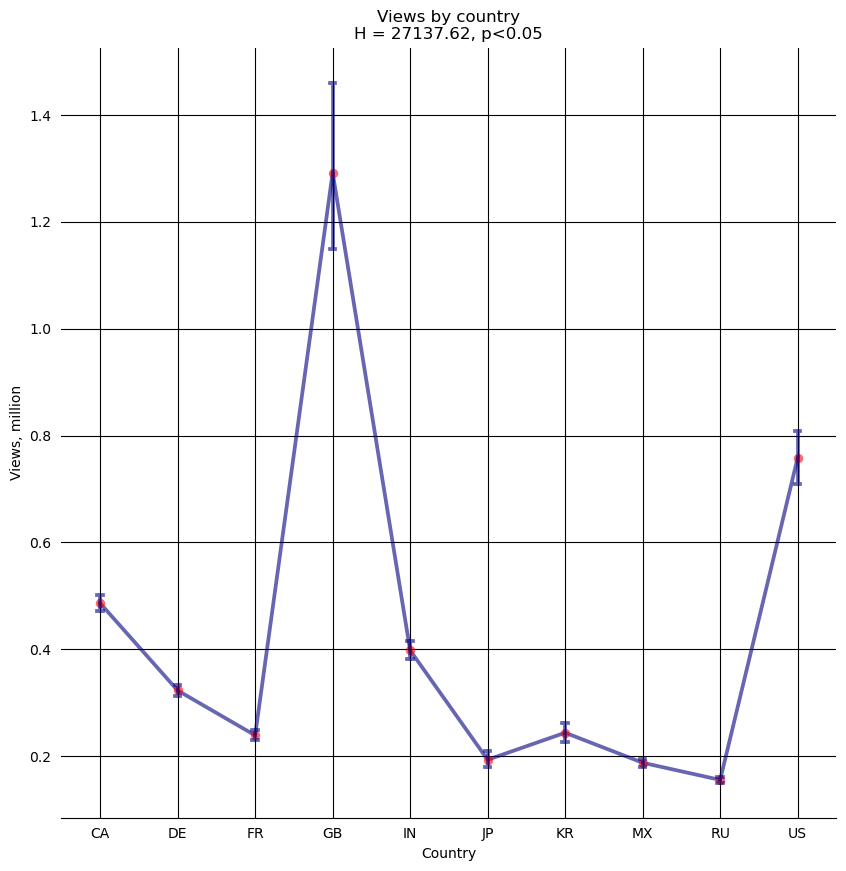

In [53]:
# add new column with reduced views by million
grouped_by_country_array_of_views["views_million"] = grouped_by_country_array_of_views["views"].apply(lambda x: x / 1_000_000)

plt.figure(figsize=(10, 10))
sns.pointplot(x="country", 
              y="views_million",
              data=grouped_by_country_array_of_views.explode("views_million"),
              errorbar=("ci", 95), 
              capsize=0.07,
              color="navy",
              alpha=0.6,
              mfc="red",
              mec="none",
              marker="o")
plt.grid(True)
plt.title(f"Views by country\nH = {H_stat:.2f}, p<0.05")
plt.xlabel("Country")
plt.ylabel("Views, million"),
plt.xticks(ticks=range(grouped_by_country_array_of_views.shape[0]), labels=[row["country"] for index, row in grouped_by_country_array_of_views.iterrows()])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The graph shows that only two groups of countries fall within the confidence intervals: France with South Korea, and Japan with Mexico. The remaining countries are too far apart from each other, which may indicate the presence of statistically significant differences between them.

I propose conducting pairwise tests. The formula for calculating pairwise comparisons is $10 * ((10-1) / 2) = 45$ pairwise comparisons.  
We will use the <strong><u>Mann-Whitney U test</u></strong> for this analysis.

In [54]:
result_table = {
    "pair_of_countries": list(),
    "Statistic": list(),
    "P-value": list()
}

for i in range(grouped_by_country_array_of_views.shape[0]):
    for j in range(i+1, grouped_by_country_array_of_views.shape[0]):
        U_stat, p_value = stats.mannwhitneyu(
            grouped_by_country_array_of_views.iloc[i]["views"], 
            grouped_by_country_array_of_views.iloc[j]["views"])
        result_table["pair_of_countries"].append(f"{grouped_by_country_array_of_views.iloc[i]["country"]} : {grouped_by_country_array_of_views.iloc[j]["country"]}")
        result_table["Statistic"].append(format_number(round(U_stat, 2)))
        result_table["P-value"].append(f"{p_value:.4f}")

print(tabulate.tabulate(
    tabular_data=result_table,
    headers="keys",
    tablefmt="fancy_grid",
    stralign="left",
    numalign="right"
))

╒═════════════════════╤═══════════════╤═══════════╕
│ pair_of_countries   │ Statistic     │   P-value │
╞═════════════════════╪═══════════════╪═══════════╡
│ CA : DE             │ 487 690 303.5 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : FR             │ 557 703 164.0 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : GB             │ 35 505 926.0  │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : IN             │ 227 619 459.0 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : JP             │ 244 352 499.5 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : KR             │ 278 699 157.5 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : MX             │ 628 926 867.0 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : RU             │ 643 615 976.0 │         0 │
├─────────────────────┼───────────────┼───────────┤
│ CA : US   

Based on the analysis, we can conclude that our assumptions were correct, and statistically significant differences are present in almost all pairs, except for three countries: <strong>Japan</strong>, <strong>France</strong>, and <strong>Mexico</strong>. For these countries, we have a sufficiently high p-value to assert that these samples do not have statistically significant differences.

The percentage of such country pairs is $3/45 = 6\%$, leading us to conclude that the inclusion of a video in the trending list is indeed influenced by the country. In other words, it is easier to get into the trending list in Mexico, where videos typically need an average of around two hundred thousand views, compared to the United Kingdom.

However, we have only conducted an univariate analysis. Videos also have other parameters such as the number of likes and dislikes, comments, and the date and time of publication, which we will analyze in the subsequent chapters.

---
# <center>3. Likes/Dislikes</center>
<center><img src='images/i like it.jpg' width=700, heigth=700></center>

## 3.1 Key Performance Indicators

To start with, let’s display the key metrics for likes and dislikes overall and by country.

In [55]:
table_descriptive_values = {
    "Country": ["General"],
    "max": [general_df["likes"].max()],
    "min": [general_df["likes"].min()],
    "avg": [round(general_df["likes"].mean(), 2)],
    "median": [general_df["likes"].median()]
}

for df in all_DataFrames:
    table_descriptive_values["Country"].append(df.loc[0, "country"])
    table_descriptive_values["max"].append(df["likes"].max())
    table_descriptive_values["min"].append(df["likes"].min())
    table_descriptive_values["avg"].append(round(df["likes"].mean(), 2))
    table_descriptive_values["median"].append(df["likes"].median())

# Let's format the numbers by separating their digits with spaces to make them easier to read.
columns_list = ["max", "min", "avg", "median"]
table_descriptive_values = {k: ([format_number(num) for num in v]) if k in columns_list else v for k, v in table_descriptive_values.items()}

print("Table of likes")
print(tabulate.tabulate(
    tabular_data=table_descriptive_values, 
    headers="keys", 
    tablefmt="fancy_grid", 
    stralign="left", 
    numalign="right"))

Table of likes
╒═══════════╤═══════════╤═══════╤═══════════╤══════════╕
│ Country   │ max       │   min │ avg       │ median   │
╞═══════════╪═══════════╪═══════╪═══════════╪══════════╡
│ General   │ 4 470 923 │     0 │ 11 950.45 │ 1 516.0  │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ CA        │ 3 880 074 │     0 │ 18 398.37 │ 4 724.0  │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ DE        │ 3 880 074 │     0 │ 12 132.69 │ 1 675.0  │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ FR        │ 3 880 074 │     0 │ 9 348.35  │ 1 164.0  │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ GB        │ 3 880 074 │     0 │ 54 318.55 │ 8 373.5  │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ IN        │ 1 735 914 │     0 │ 10 481.03 │ 1 491.0  │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ JP        │ 4 470 923 │     0 │ 6 380.23  │ 460.0    │
├───────────┼───────────┼───────┼───────────┼──────────┤
│ KR        │ 4 

In [56]:
table_descriptive_values = {
    "Country": ["General"],
    "max": [general_df["dislikes"].max()],
    "min": [general_df["dislikes"].min()],
    "avg": [round(general_df["dislikes"].mean(), 2)],
    "median": [general_df["dislikes"].median()]
}

for df in all_DataFrames:
    table_descriptive_values["Country"].append(df.loc[0, "country"])
    table_descriptive_values["max"].append(df["dislikes"].max())
    table_descriptive_values["min"].append(df["dislikes"].min())
    table_descriptive_values["avg"].append(round(df["dislikes"].mean(), 2))
    table_descriptive_values["median"].append(df["dislikes"].median())

# Let's format the numbers by separating their digits with spaces to make them easier to read.
columns_list = ["max", "min", "avg", "median"]
table_descriptive_values = {k: ([format_number(num) for num in v]) if k in columns_list else v for k, v in table_descriptive_values.items()}

print("Table of dislikes")
print(tabulate.tabulate(
    tabular_data=table_descriptive_values, 
    headers="keys", 
    tablefmt="fancy_grid", 
    stralign="left", 
    numalign="right"))

Table of dislikes
╒═══════════╤═════════╤═══════╤══════════╤══════════╕
│ Country   │ max     │   min │ avg      │   median │
╞═══════════╪═════════╪═══════╪══════════╪══════════╡
│ General   │ 884 965 │     0 │ 603.28   │       78 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ CA        │ 483 943 │     0 │ 743.18   │      179 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ DE        │ 483 937 │     0 │ 667.31   │       78 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ FR        │ 483 950 │     0 │ 384.52   │       50 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ GB        │ 629 123 │     0 │ 2 347.27 │      251 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ IN        │ 483 933 │     0 │ 575.26   │      152 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ JP        │ 119 053 │     0 │ 249.92   │       29 │
├───────────┼─────────┼───────┼──────────┼──────────┤
│ KR        │ 884 965 │     0 │ 277.6    │       44 │
├─────────

As you can see, some videos have no likes or dislikes, even though they were trending on YouTube in certain countries.  
This may be due to the authors disabling this feature.  
It is interesting that even without likes or dislikes, a video can still make it to the trending list.

Let's create a small random sample and analyze these videos.

In [57]:
display(general_df.loc[
    general_df["likes"] == 0, 
    ["country", "publish_date", "trending_date", "category", "views", "likes", "dislikes", "channel_title", "title"]
    ].sample(5))

,country,publish_date,trending_date,category,views,likes,dislikes,channel_title,title
1881,FR,2017-11-21,2017-11-23,People & Blogs,2300,0,0,David Reboursiere,1211 CR Tadjer et Bianchin Pau Brive J10 2017 ...
22574,MX,2018-03-09,2018-03-09,Entertainment,89010,0,0,El Mundo del Reality,Exatlon Mexico Ayuda a Ernesto a Ganar el prim...
29819,FR,2018-04-19,2018-04-20,People & Blogs,40500,0,0,6Medias,Gros coup dur pour Adriana Karembeu
32312,RU,2018-05-01,2018-05-02,NaN,13142,0,0,Таня Карацуба Сеид-Бурхан,Приватизация по Чубайсу завершилась: мы уже н...
37518,MX,2018-05-29,2018-05-30,NaN,249202,0,0,Crusher Mx,Quién Tiene la Razón Bebeshita o Alexia ??


In [58]:
display(general_df.loc[
    general_df["dislikes"] == 0, 
    ["country", "publish_date", "trending_date", "category", "views", "likes", "dislikes", "channel_title", "title"]
    ].sample(5))

,country,publish_date,trending_date,category,views,likes,dislikes,channel_title,title
7790,JP,2018-03-24,2018-03-25,People & Blogs,8249,89,0,のぎちゃんねる,戦慄迷宮に行く与田に大園桃子「本当に怖いのはお化けより人だよ」
10122,JP,2018-04-04,2018-04-07,Howto & Style,10597,0,0,w.yumyam,【かぎ針編み】ダイソーの糸でできる！プランドプーリング♪/How to crochet pl...
11080,KR,2018-01-19,2018-01-20,News & Politics,120239,0,0,윤창중칼럼세상 TV,"(충격리포트) 문재인, 끝났다 윤창중 TV 칼럼(2018.01.19)"
33273,RU,2018-05-06,2018-05-07,Sports,34155,0,0,Топовые Мысли,Кто еще уходил от Тутберидзе? Зачем это нужно ...
16862,MX,2018-02-08,2018-02-08,People & Blogs,10597,0,0,Internovelas,Sangre de mi Tierra | Capitulo 50| 1/6 | HD


As seen from the samples, videos with no likes or dislikes can either have these features disabled or simply remain untouched by viewers, especially when it comes to zero dislikes.

## 3.1 Categories without likes and dislikes

I suggest examining the categories where videos with entirely zero likes or dislikes are predominant in the overall sample, as well as by country.

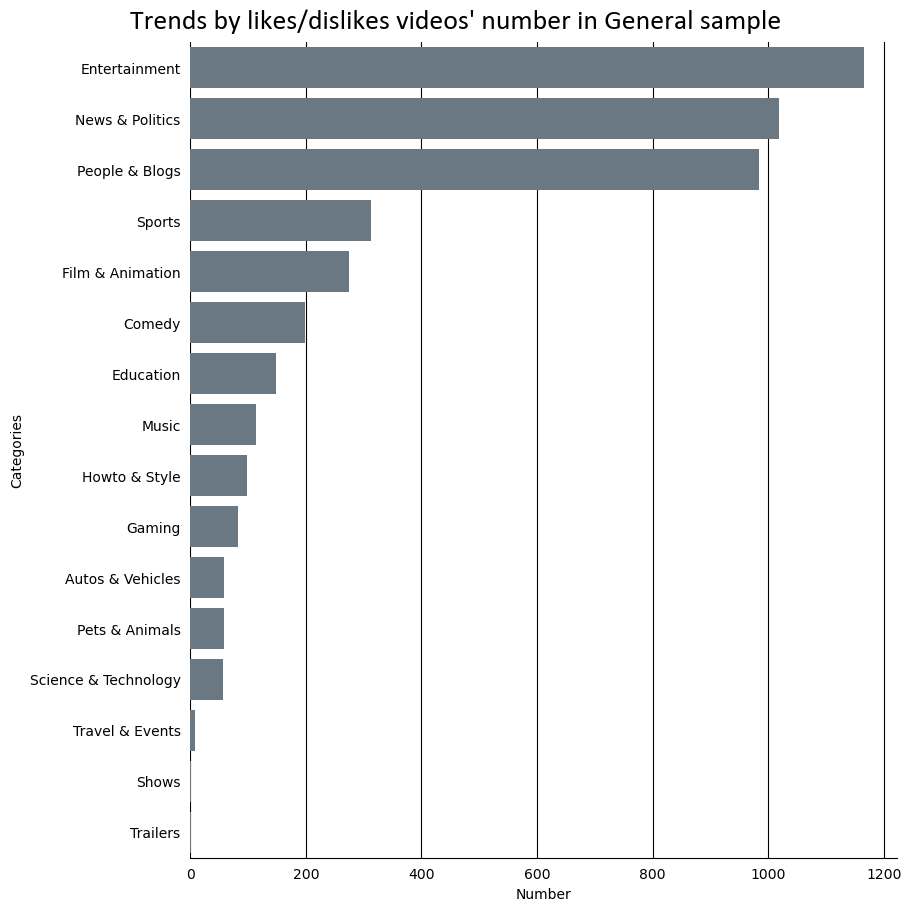

In [59]:
fig, axs = plt.subplots(figsize=(9,9),
            layout='constrained'
)
df = (general_df
      .loc[(general_df["likes"] == 0) & (general_df["dislikes"] == 0)]
      .groupby(by="category", as_index=False)
      .agg(Number=("category", "count"))
      .rename(columns={"category": "Category"}))
df.sort_values(by="Number", ascending=False, inplace=True)
sns.barplot(
    data=df,
    x="Number",
    y="Category",
    ax=axs,
    orient="h",
    saturation=1,
    width=0.80,
    color="#697882",
    alpha=1,
    native_scale=True
)
sns.set_style({
    "grid.color": "black",
    "axes.edgecolor": "black",
    "axes.grid": True,
    "axes.axisbelow": True,

    "axes.spines.left": False,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,

    "xtick.bottom": False,
    "xtick.top": False,
    "ytick.left": False,
    "ytick.right": False,

    "font_family": "calibri"
})

axs.set_ylabel("Categories")
axs.set_xlabel("Number")

# new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

if col == 1:
    row += 1; col = 0
else:
    col += 1

fig.suptitle(f"Trends by likes/dislikes videos' number in General sample", size=20, font="Calibri")
plt.show()

In [60]:
def grouping_by_likes_dislikes(df: pd.DataFrame) -> dict:
    df = df.loc[(df["likes"] == 0) & (df["dislikes"] == 0)].groupby(by="category", as_index=False).agg(number=("category", "count"))
    our_dict = dict()
    for index, row in df.iterrows():
        our_dict[row["category"]] = row["number"]
    return our_dict

grouped_by_likes_dislikes = general_df.groupby(by="country", as_index=True).apply(grouping_by_likes_dislikes, include_groups=False).reset_index()
grouped_by_likes_dislikes.columns = ("country", "dict")
display(grouped_by_likes_dislikes)

,country,dict
0,CA,"{'Education': 3, 'Entertainment': 92, 'Film & ..."
1,DE,"{'Autos & Vehicles': 11, 'Comedy': 26, 'Educat..."
2,FR,"{'Autos & Vehicles': 29, 'Comedy': 17, 'Educat..."
3,GB,"{'Entertainment': 2, 'Film & Animation': 7, 'G..."
4,IN,"{'Education': 96, 'Entertainment': 87, 'Film &..."
5,JP,"{'Autos & Vehicles': 13, 'Comedy': 6, 'Educati..."
6,KR,"{'Comedy': 53, 'Education': 8, 'Entertainment'..."
7,MX,"{'Education': 19, 'Entertainment': 212, 'Film ..."
8,RU,"{'Autos & Vehicles': 5, 'Comedy': 96, 'Educati..."
9,US,"{'Education': 2, 'Entertainment': 3, 'Film & A..."


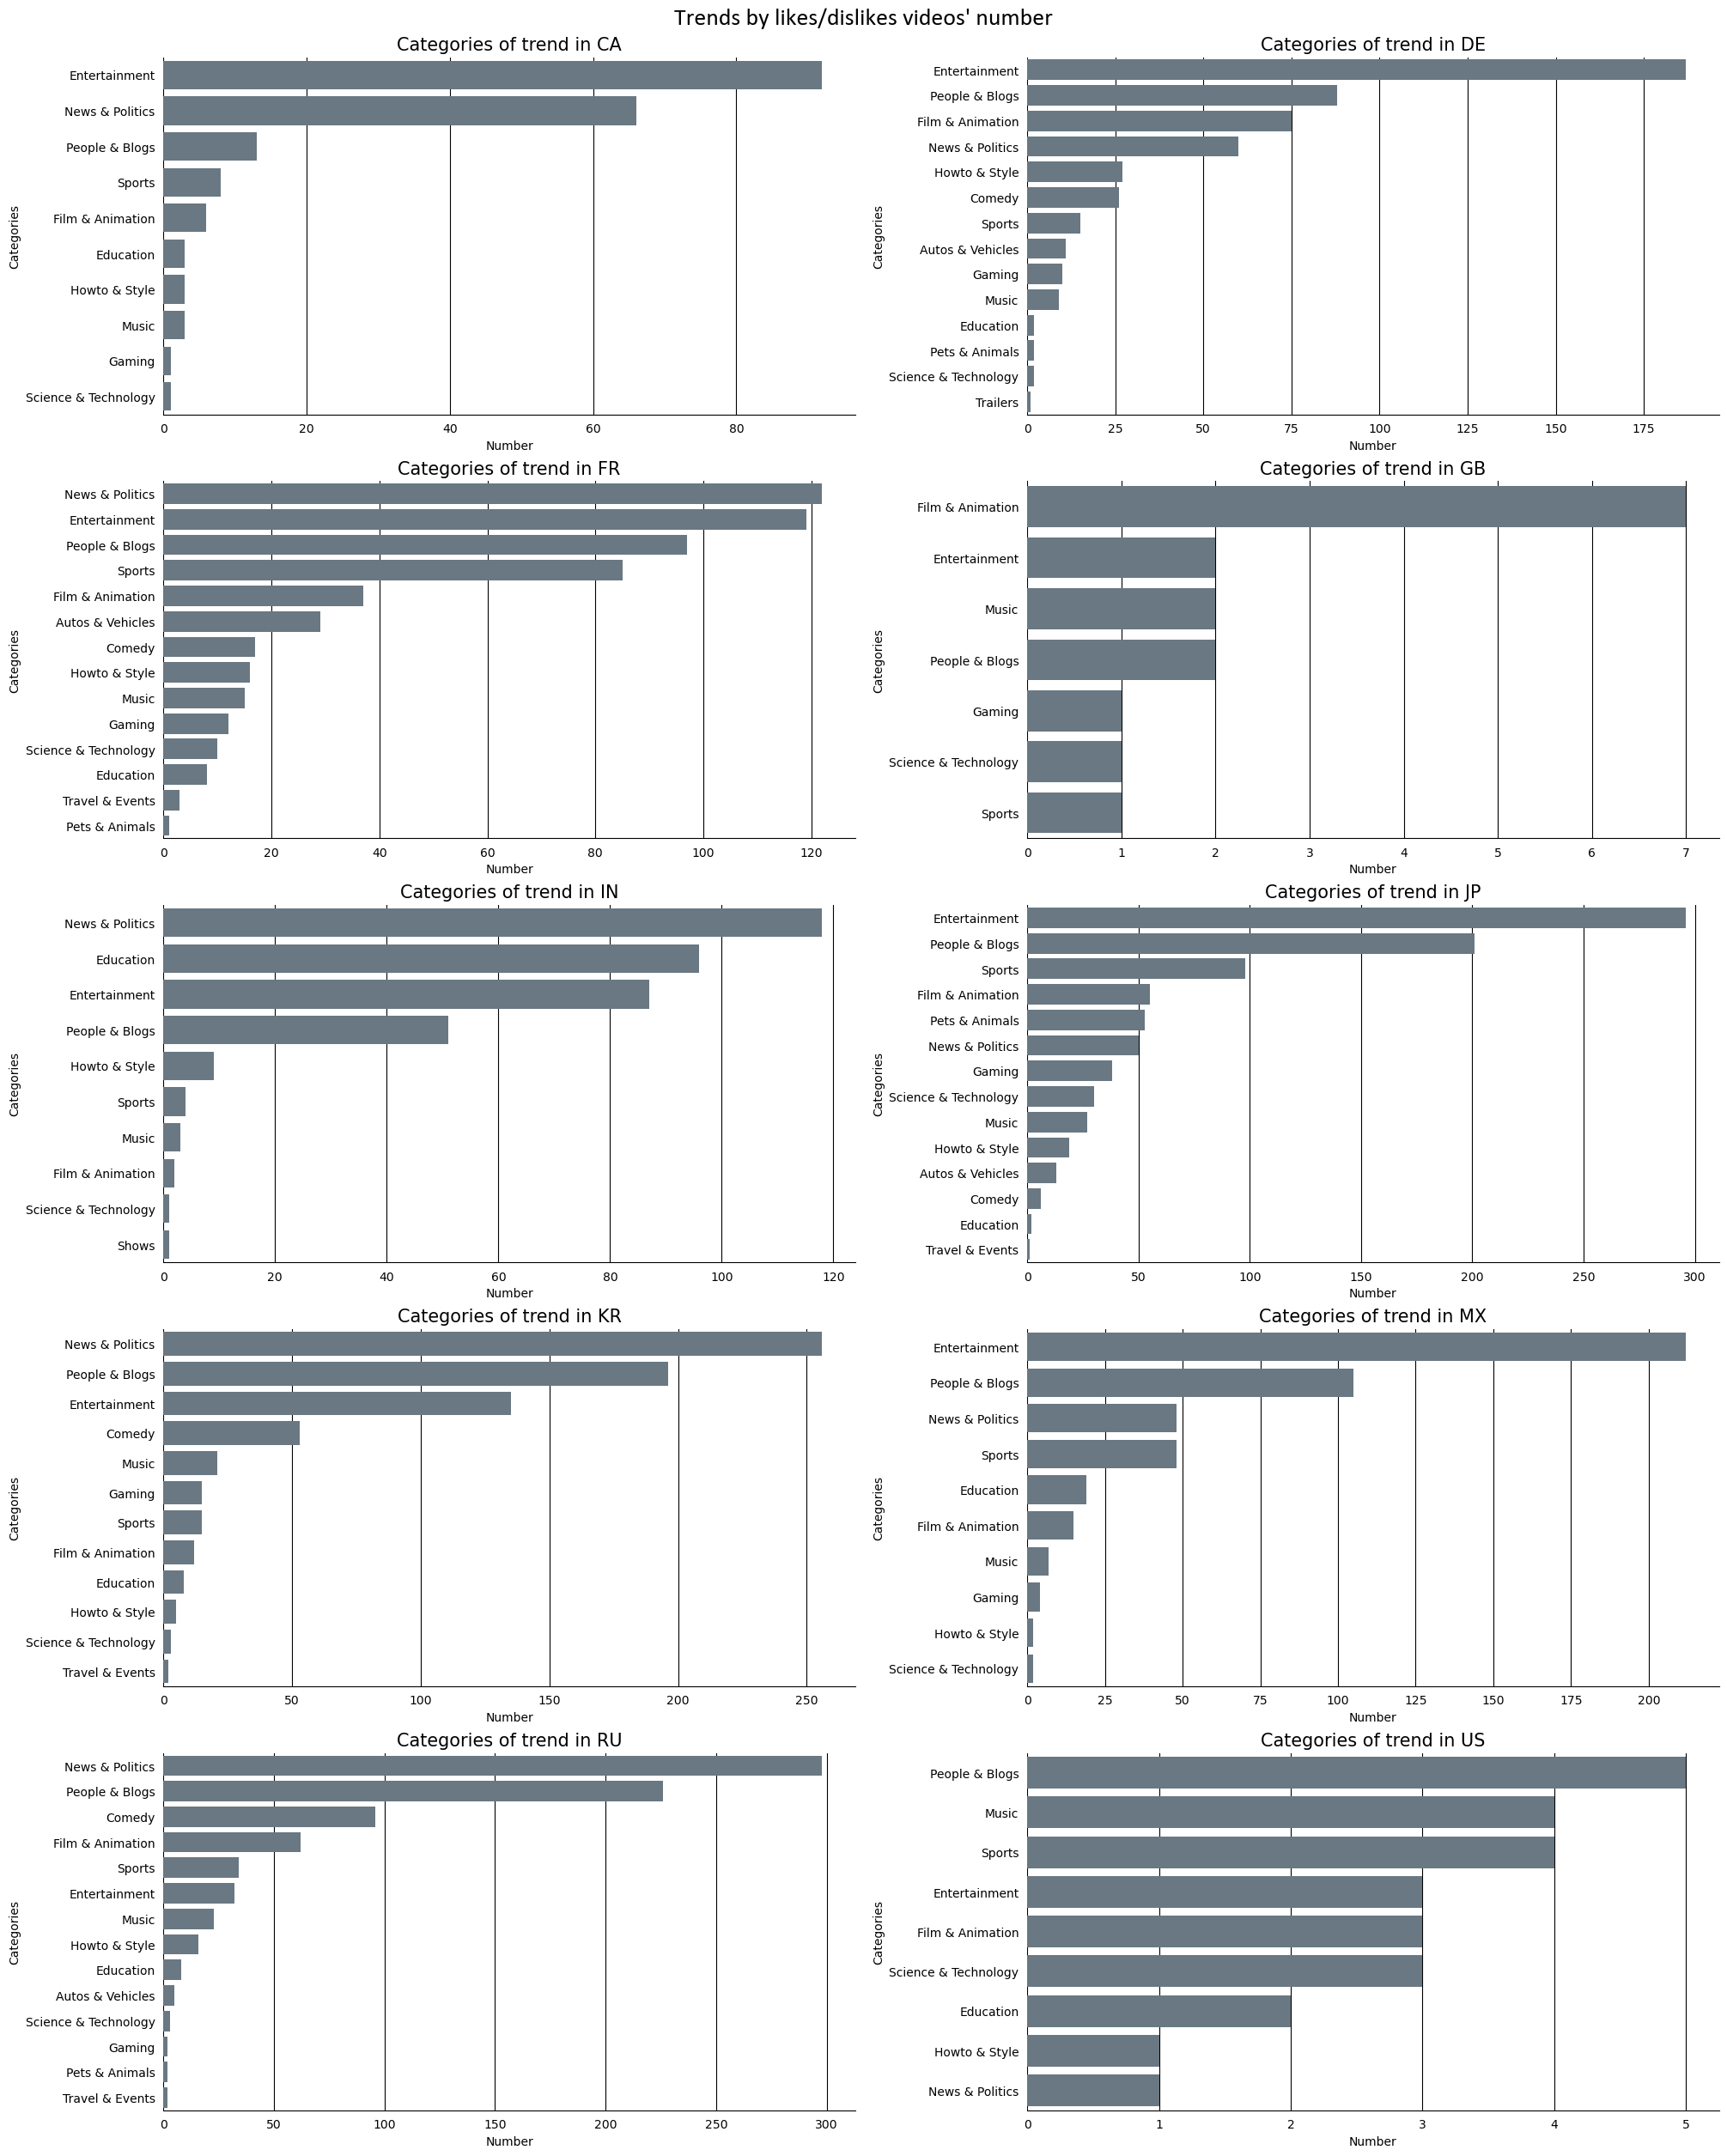

In [61]:
fig, axs = plt.subplots(
    ncols=2,
    nrows=(math.ceil(len(grouped_by_likes_dislikes) / 2)),
    figsize=(20,25),
    layout='constrained'
)
row = col = 0
for index, rows in grouped_by_likes_dislikes.iterrows():
    df = pd.DataFrame(list(rows["dict"].items()), columns=["Category", "Number"])
    df.sort_values(by="Number", ascending=False, inplace=True)
    sns.barplot(
        data=df,
        x="Number",
        y="Category",
        ax=(new_ax := axs[row][col]),
        orient="h",
        saturation=1,
        width=0.80,
        color="#697882",
        alpha=1,
        native_scale=True
    )
    sns.set_style({
        "grid.color": "black",
        "axes.edgecolor": "black",
        "axes.grid": True,
        "axes.axisbelow": True,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "font_family": "calibri"
    })

    new_ax.set_title(f"Categories of trend in {str(rows["country"])}", size=15)
    new_ax.set_ylabel("Categories")
    new_ax.set_xlabel("Number")

    # new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

    if col == 1:
        row += 1; col = 0
    else:
        col += 1

fig.suptitle("Trends by likes/dislikes videos' number", size=20, font="Calibri")
plt.show()

In [62]:
print(f"Total number of videos: {format_number(y := (general_df["video_id"].count()))}")
print(f"Number of videos without likes/dislikes: {format_number(x := (general_df.loc[(general_df["likes"] == 0) & (general_df["dislikes"] == 0)]["video_id"].count()))}")
print(f"Ratio: {round((x / y), 2)}%")

Total number of videos: 207 143
Number of videos without likes/dislikes: 4 814
Ratio: 0.02%


If we look at the overall chart, the predominant categories of trending videos where likes and dislikes are disabled (possibly by the authors themselves) are <strong>Entertainment</strong>, <strong>News & Politics</strong>, and <strong>People & Blogs</strong>.

However, an analysis by country shows that this situation varies significantly depending on the country and likely internal or external factors.  
For example, the conclusions from the previous analysis of trending videos in South Korea are also relevant here: there is a large predominance of videos with a political and news focus. These types of videos, by their nature, should aim to present ideas, thoughts, news, and events from an objective standpoint, avoiding subjective judgments. Therefore, disabling likes and dislikes can be justified, as it encourages viewers to form their own opinions after watching the video, rather than being influenced by the crowd.

It is worth noting that such videos are significantly fewer in the United Kingdom and the United States, countries with the most developed democracies and freedom of speech.

## 3.2 Likes-Dislikes ratio

Now let's calculate the like-to-dislike (<strong>Likes-Dislikes</strong>) ratio for each category. In other words, we will determine how many likes (<i>numerator</i>) there are per dislike (<i>denominator</i>).

In [63]:
def grouping_by_likes_dislikes_ratio(df: pd.DataFrame) -> pd.Series:
    return pd.Series(data=[round(
                (df["likes"].sum() / x) if ((x := df["dislikes"].sum())) else 0, 
                2)], index=["Ratio"])

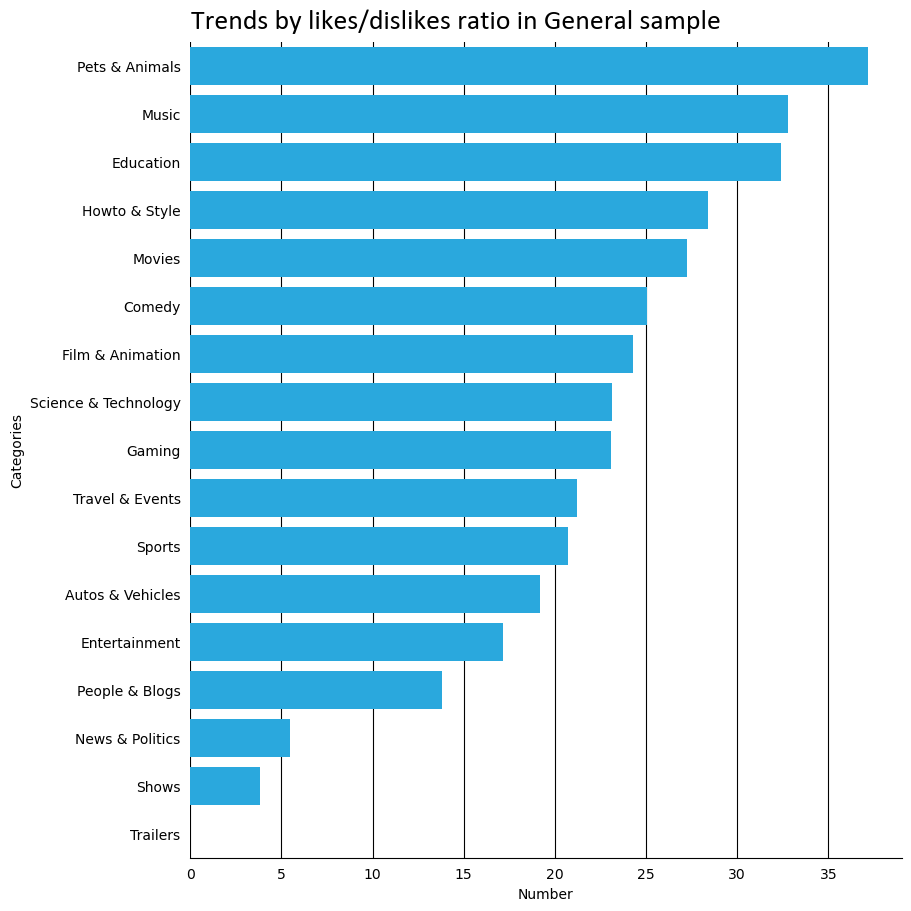

In [64]:
fig, axs = plt.subplots(figsize=(9,9),
            layout='constrained'
)
df = (general_df
      .groupby(by="category", as_index=True)
      .apply(grouping_by_likes_dislikes_ratio, include_groups=False)
      .reset_index()
      .rename(columns={"category": "Category", None: "Ratio"}))
df.sort_values(by="Ratio", ascending=False, inplace=True)
sns.barplot(
    data=df,
    x="Ratio",
    y="Category",
    ax=axs,
    orient="h",
    saturation=1,
    width=0.80,
    color="#2AA8DD",
    alpha=1,
    native_scale=True
)
sns.set_style({
    "grid.color": "black",
    "axes.edgecolor": "black",
    "axes.grid": True,
    "axes.axisbelow": True,

    "axes.spines.left": False,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,

    "xtick.bottom": False,
    "xtick.top": False,
    "ytick.left": False,
    "ytick.right": False,

    "font_family": "calibri"
})

axs.set_ylabel("Categories")
axs.set_xlabel("Number")

# new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

if col == 1:
    row += 1; col = 0
else:
    col += 1

fig.suptitle(f"Trends by likes/dislikes ratio in General sample", size=20, font="Calibri")
plt.show()

In [65]:
def grouping_by_likes_dislikes_ratio_1(df: pd.DataFrame) -> dict:
    df = df.groupby(by="category", as_index=True).apply(grouping_by_likes_dislikes_ratio, include_groups=False).reset_index()
    our_dict = dict()
    for index, row in df.iterrows():
        our_dict[row["category"]] = row["Ratio"]
    return our_dict

grouped_by_likes_dislikes_1 = general_df.groupby(by="country", as_index=True).apply(grouping_by_likes_dislikes_ratio_1, include_groups=False).reset_index()
grouped_by_likes_dislikes_1.columns = ("country", "dict")
display(grouped_by_likes_dislikes_1)

,country,dict
0,CA,"{'Autos & Vehicles': 34.3, 'Comedy': 42.03, 'E..."
1,DE,"{'Autos & Vehicles': 33.09, 'Comedy': 30.52, '..."
2,FR,"{'Autos & Vehicles': 28.03, 'Comedy': 39.42, '..."
3,GB,"{'Autos & Vehicles': 12.91, 'Comedy': 33.07, '..."
4,IN,"{'Autos & Vehicles': 23.64, 'Comedy': 28.93, '..."
5,JP,"{'Autos & Vehicles': 15.57, 'Comedy': 22.07, '..."
6,KR,"{'Autos & Vehicles': 15.18, 'Comedy': 30.72, '..."
7,MX,"{'Autos & Vehicles': 39.38, 'Comedy': 30.1, 'E..."
8,RU,"{'Autos & Vehicles': 14.93, 'Comedy': 8.75, 'E..."
9,US,"{'Autos & Vehicles': 17.11, 'Comedy': 38.04, '..."


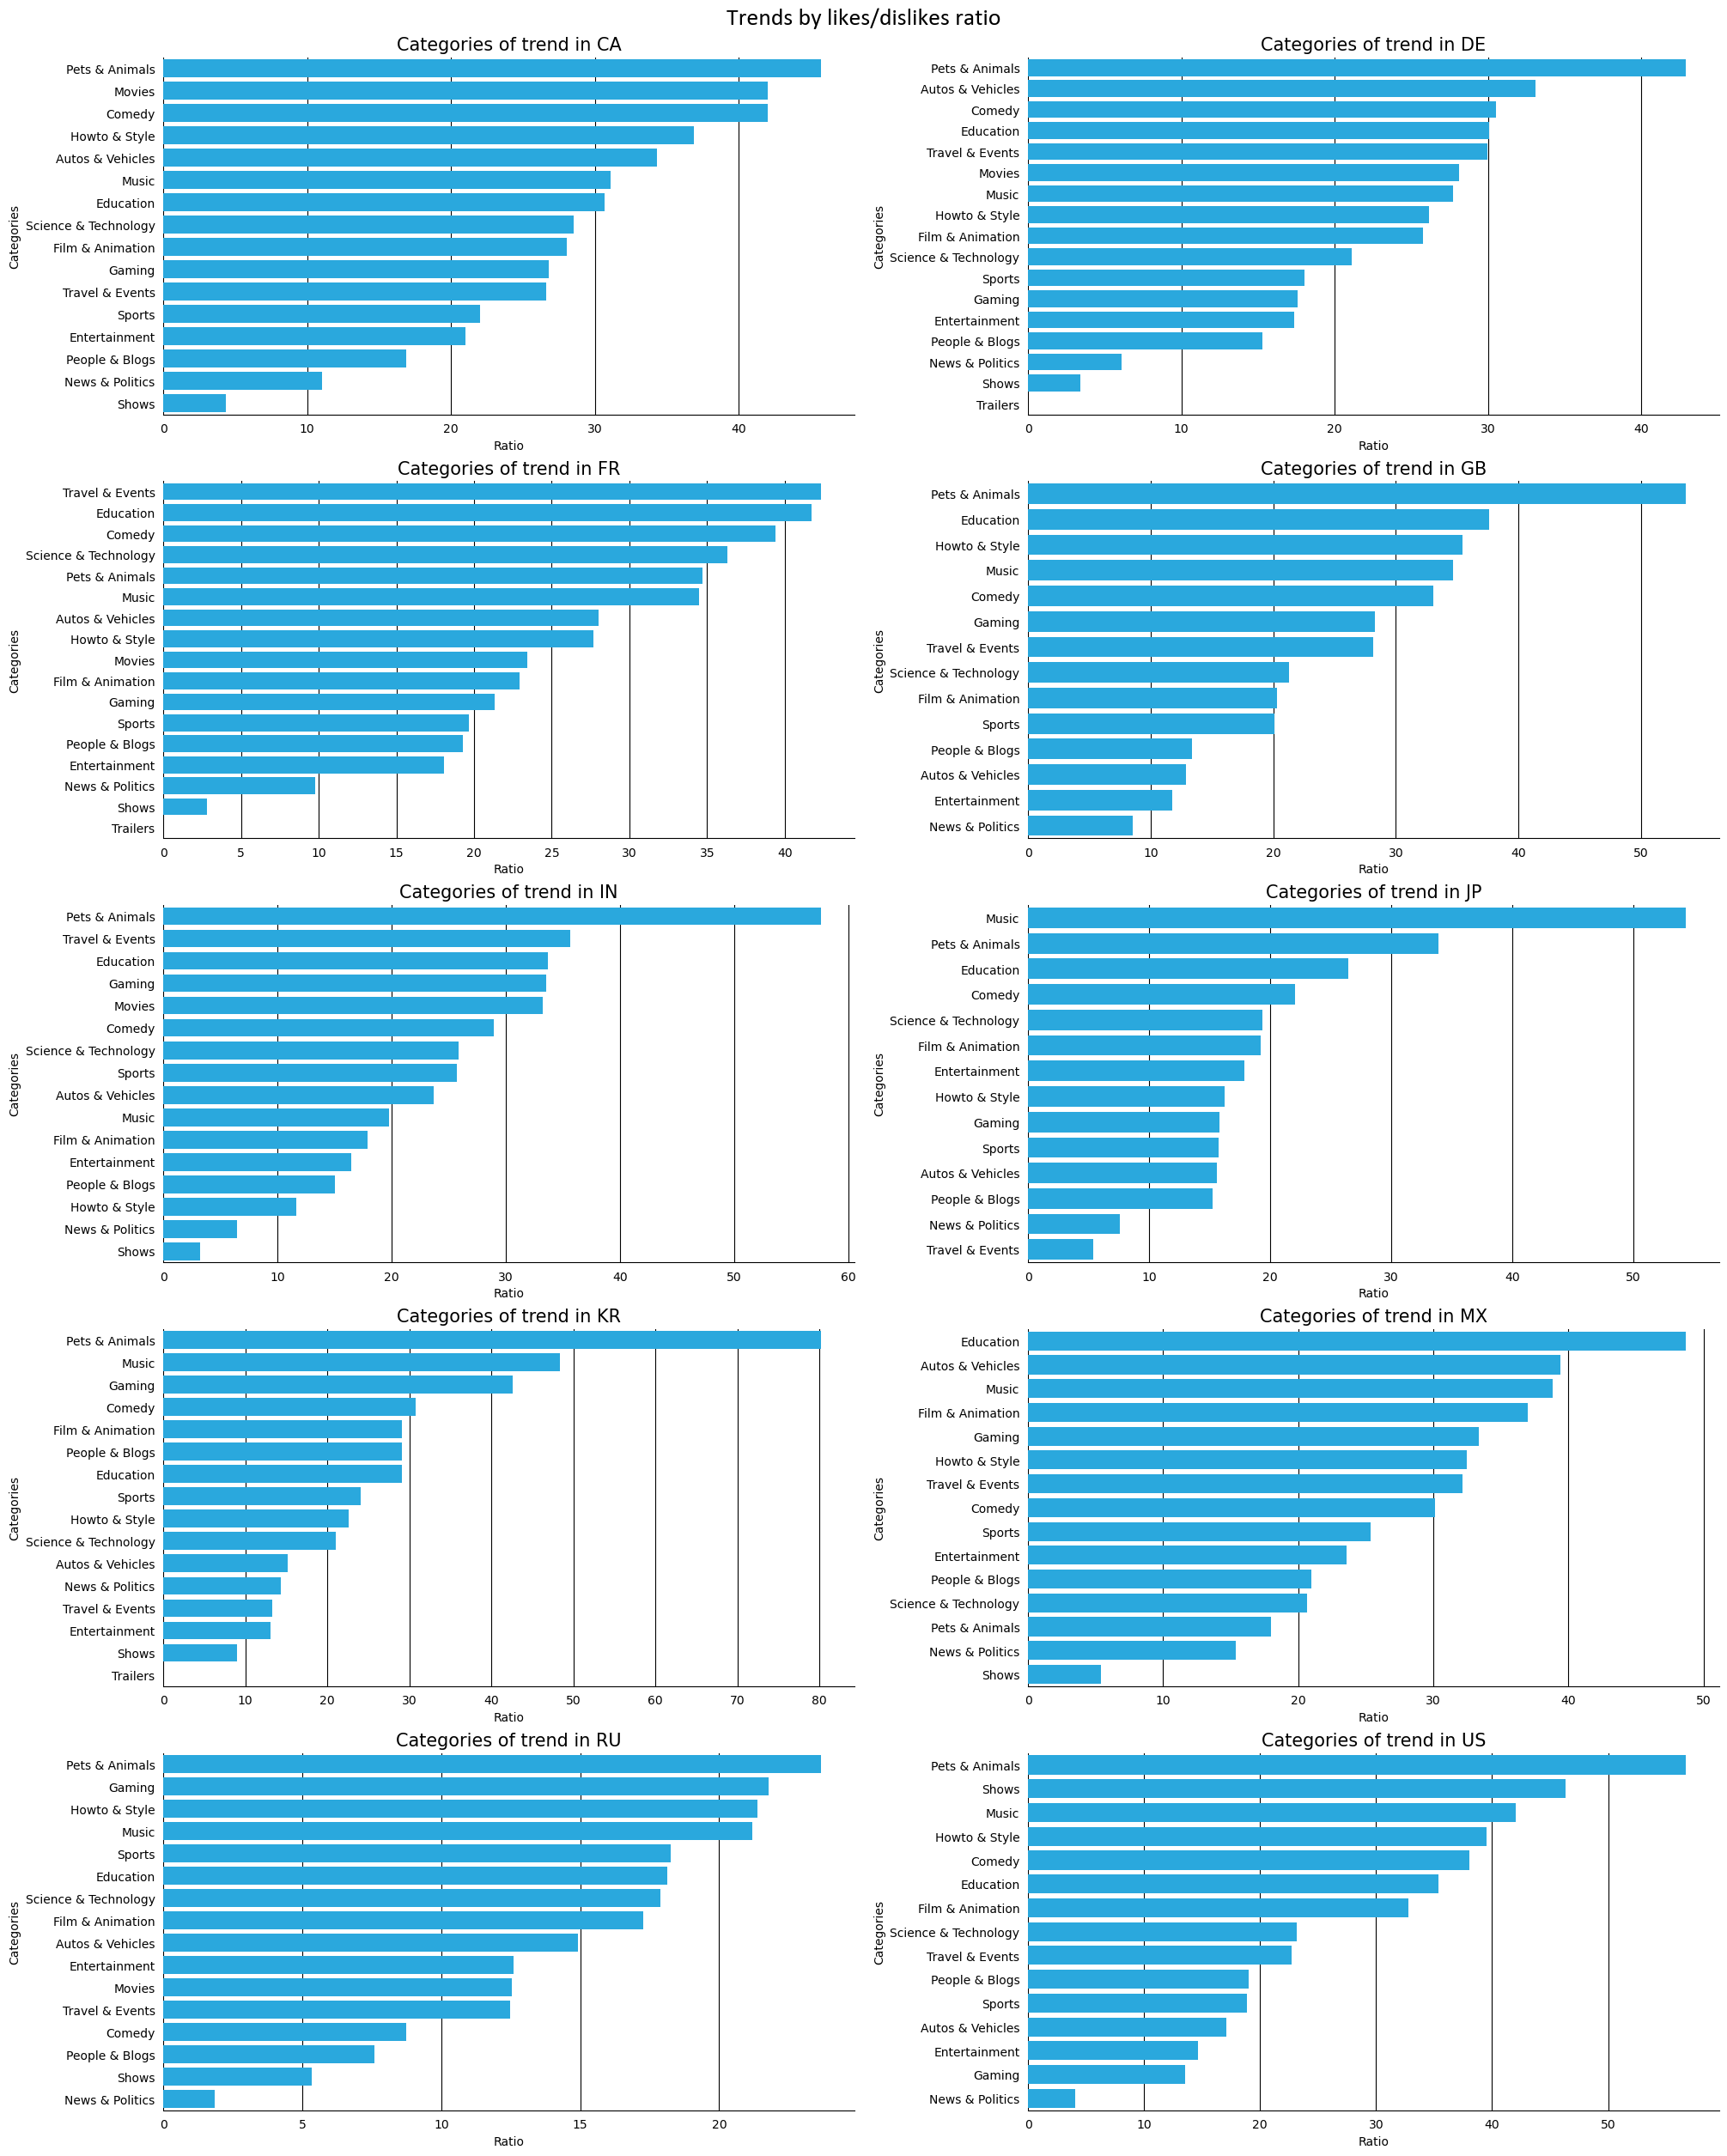

In [66]:
fig, axs = plt.subplots(
    ncols=2,
    nrows=(math.ceil(len(grouped_by_likes_dislikes_1) / 2)),
    figsize=(20,25),
    layout='constrained'
)
row = col = 0
for index, rows in grouped_by_likes_dislikes_1.iterrows():
    df = pd.DataFrame(list(rows["dict"].items()), columns=["Category", "Number"])
    df.sort_values(by="Number", ascending=False, inplace=True)
    sns.barplot(
        data=df,
        x="Number",
        y="Category",
        ax=(new_ax := axs[row][col]),
        orient="h",
        saturation=1,
        width=0.80,
        color="#2AA8DD",
        alpha=1,
        native_scale=True
    )
    sns.set_style({
        "grid.color": "black",
        "axes.edgecolor": "black",
        "axes.grid": True,
        "axes.axisbelow": True,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "font_family": "calibri"
    })

    new_ax.set_title(f"Categories of trend in {str(rows["country"])}", size=15)
    new_ax.set_ylabel("Categories")
    new_ax.set_xlabel("Ratio")

    # new_ax.set_xticklabels(new_ax.get_xticks(), rotation=45)

    if col == 1:
        row += 1; col = 0
    else:
        col += 1

fig.suptitle("Trends by likes/dislikes ratio", size=20, font="Calibri")
plt.show()

I noticed that in three countries, the <strong>Trailers</strong> category has the lowest ratio (possibly zero due to a total of zero dislikes).  
Let's take a look at these videos.

In [67]:
display(general_df.loc[
    general_df["category"] == "Trailers", 
    ["country", "category", "trending_date", "publish_date", "views", "likes", "dislikes", "channel_title", "title"]
    ])

,country,category,trending_date,publish_date,views,likes,dislikes,channel_title,title
34305,FR,Trailers,2018-05-13,2018-05-09,3136,54,0,La Malédiction Winchester (VF) - Bande Annonce,La Malédiction Winchester (VF) - Bande Annonce
25841,DE,Trailers,2018-03-25,2018-03-08,8804,0,0,Fack Ju Göhte 3 - Trailer,Fack Ju Göhte 3 - Trailer
16993,KR,Trailers,2018-02-24,2018-02-22,13454,3,0,신과함께 : 죄와벌,TRAILER VIDEO


I assume these are trailers for some local TV shows or movies.  
I believe their appearance in the trending list is solely due to the internal workings of YouTube's algorithms. It is unlikely that a video which has only garnered three thousand views in four days could make it to the global trends or the trends in the US or the UK.  
However, after analyzing the view counts, it becomes clear that such a possibility exists.

The highest <strong>Likes-Dislikes ratio</strong> in the overall dataset is found in the <strong>Animals</strong> category (over 35 likes per dislike), followed by <strong>Music</strong> and <strong>Education</strong> (over 30 likes per dislike).  
However, when analyzing this ratio by country trends, it is evident that the maximum value is significantly higher and in a different category.  
For instance, in France, the highest ratio is for <strong>Travel</strong> videos, with over 40 likes per dislike, while in Japan, <strong>Music</strong> videos average more than 55 likes per dislike.

Can we conclude that the French have a strong passion for travel, and the Japanese have a rich musical taste?

I also noticed that the categories with the lowest ratio are <strong>Shows</strong> and <strong>News & Politics</strong>. It would be ideal to delve into the parameters that categorize videos as <strong>Shows</strong> versus <strong>Entertainment</strong>, as they seem similar to me.  
However, the ratio for <strong>Entertainment</strong> videos is much higher.  
When it comes to TV shows, their diversity might be too broad to appeal to many people.

As for <strong>News & Politics</strong>, this situation seems quite normal. News can vary widely, and in recent years there has been a predominance of negative content, making viewers less inclined to like the videos and more likely to dislike and close them.

## 3.3 Testis for Normality

in progress

## 3.4 Correlation between likes and dislikes

in progress

## 3.5 Correlation between likes/dislikes and views

in progress

In [77]:
general_df.to_csv(sep=";", header=True, path_or_buf=(r"F:\Study projects\Other files\general_df.csv"))

In [83]:
general_df.to_xml(path_or_buffer=(r"F:\Study projects\Other files\general_df.xml"))

In [75]:
general_df["video_error_or_removed"].unique()

[False, True]
Categories (2, bool): [False, True]

In [86]:
display(general_df.loc[~(general_df["likes"] > 0)].sort_values(by="views", ascending=False).head())

,video_id,trending_date,category,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
14022,BhIEIO0vaBE,2018-02-06,People & Blogs,To Our Daughter,Kylie Jenner,2018-02-04,22,20:27:38,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",35832484,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,KR
24476,9TUBf6l7FBg,2018-04-16,Music,Coachella 2018 LIVE Channel 1,Coachella,2018-04-05,10,06:48:28,[none],24004779,0,0,3,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,KR
16160,BhIEIO0vaBE,2018-02-05,People & Blogs,To Our Daughter,Kylie Jenner,2018-02-04,22,20:27:38,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",20921796,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,CA
16178,BhIEIO0vaBE,2018-02-05,People & Blogs,To Our Daughter,Kylie Jenner,2018-02-04,22,20:27:38,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",20921796,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,MX
16186,BhIEIO0vaBE,2018-02-05,People & Blogs,To Our Daughter,Kylie Jenner,2018-02-04,22,20:27:38,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",20921796,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,GB
